# Analyse Realtime Data

In [1]:
#pip install geopy

In [2]:
# Import all required modules
import pandas as pd
#import random
import numpy as np
#import pprint
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt
from datetime import datetime

import math

import os
import time # Used for playing around with timers. 
from sys import getsizeof # Used for checking how much memory a variable is using. 
import geopy.distance
from matplotlib.ticker import MaxNLocator

In [3]:
# Set max number of columns to display
pd.options.display.max_columns = 40

## GTFS - Static

##### Import the GTFS - static data and take a look at it

In [4]:
# The GTFS-static data is already available to us in the (hidden) 'gtfs_static_2020' folder
# If we start with '/' we go up to the top of the directory folder
pathname = '/course/data/gtfs_static_2020'

# Let's see what we have available in the (hidden) 'gtfs_static_2020' folder

# For every file that is in the list in the directory print out the name of the file
for file in os.listdir(pathname):
    print(file, ";", str(os.path.getsize(pathname+'/'+file)/1000)+' kb')
# Even thoough the data set is hidden we can still access it
# At the end we have the size of the file. The default unit is 'bytes'



calendar_dates.txt ; 988.769 kb
stops.txt ; 4529.801 kb
trips.txt ; 22010.921 kb
notes.txt ; 96.399 kb
stop_times.txt ; 358097.839 kb
agency.txt ; 11.23 kb
routes.txt ; 802.772 kb
calendar.txt ; 167.91 kb


In [5]:
agencydf = pd.read_csv(pathname+'/'+'agency.txt')
#agencydf.head(3)


In [6]:
tripsdf = pd.read_csv(pathname+'/'+'trips.txt')
tripsdf.head(3)

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id,block_id,wheelchair_accessible,route_direction,trip_note,bikes_allowed
0,1-31B-M-sj2-4,AA51+1,1.AA51.1-31B-M-sj2-4.2.R,1-31B-M-sj2-4.2.R,Mount Victoria,1,NaN,2,"Lithgow, then Mount Victoria",NaN,NaN
1,1-31B-M-sj2-4,AA51+1,2.AA51.1-31B-M-sj2-4.2.R,1-31B-M-sj2-4.2.R,Mount Victoria,1,NaN,2,"Lithgow, then Mount Victoria",NaN,NaN
2,1-31B-M-sj2-4,AA51+1,3.AA51.1-31B-M-sj2-4.2.R,1-31B-M-sj2-4.2.R,Mount Victoria,1,NaN,2,"Lithgow, then Mount Victoria",NaN,NaN


In [7]:
caldf = pd.read_csv(pathname+'/'+'calendar.txt')
#caldf.head(3)

In [8]:
cal_datesdf = pd.read_csv(pathname+'/'+'calendar_dates.txt')
#cal_datesdf.head(3)

In [9]:
stopsdf = pd.read_csv(pathname+'/'+'stops.txt')
stopsdf.head(3)

,stop_id,stop_code,stop_name,stop_lat,stop_lon,location_type,parent_station,wheelchair_boarding,platform_code
0,228055,228055.0,Pacific Hwy After Murray St,-33.003610,151.685566,NaN,NaN,0,NaN
1,228054,228054.0,Pacific Hwy Opp Ntaba Rd,-33.006195,151.684612,NaN,NaN,0,NaN
2,287146,287146.0,Flint St At Oxford St,-33.392373,148.014977,NaN,NaN,0,NaN


In [10]:
stop_timesdf = pd.read_csv(pathname+'/'+'stop_times.txt',dtype = str)
#stop_timesdf.head(3)


In [11]:
#stop_timesdf.dtypes

In [12]:
#stop_timesdf[stop_timesdf['trip_id'].str.contains('1061421') & stop_timesdf['stop_id'].str.contains('206123')]

In [13]:
routesdf = pd.read_csv(pathname+'/'+'routes.txt')
#routesdf.head(3)

# Make a list of routes that are part of the Sydney Buses Network-- ditching trains, ferry, light rail. There is too much data to import all trips (even just 15 seconds of it)
#busroutes = routesdf[routesdf['route_desc']=='Sydney Buses Network']['route_id'].tolist()


In [14]:
#tripsdf = pd.read_csv(pathname+'/'+'trips.txt')
#tripsdf.head(3)

# Narrow it down to only trips belonging to bus routes. 
#tripsdf=tripsdf[tripsdf['route_id'].isin(busroutes)]

### Stop List for Military Road, Victoria Rd and Paramatta Road

In [15]:
# Get all the stops on Victoria Road
df_vic = stopsdf[stopsdf.stop_name.str.startswith('Victoria Rd')][['stop_id', 'stop_lat', 'stop_lon']]

# The end points
left_lat_lon = [-33.797348, 151.004453]
right_lat_lon = [-33.869001, 151.176395]


lon_min = min(left_lat_lon[1],right_lat_lon[1])
lon_max = max(left_lat_lon[1],right_lat_lon[1])

lat_min = min(left_lat_lon[0],right_lat_lon[0])
lat_max = max(left_lat_lon[0],right_lat_lon[0])

# All the stops on a 'Victoria Rd' that is within the endpoint of the Victoria Road that we want
df_vic = df_vic[(df_vic['stop_lat'] < lat_max) & (df_vic['stop_lat'] > lat_min) & (df_vic['stop_lon'] < lon_max) & (df_vic['stop_lon'] > lon_min)]

# Save and check using this website: http://www.hamstermap.com/quickmap.php
#df_vic.to_csv('lat_long3', index = False)

In [16]:
# Get all the stops on Parramatta Road
df_parr = stopsdf[stopsdf.stop_name.str.startswith('Parramatta Rd')][['stop_id', 'stop_lat', 'stop_lon']]

# Save and check using this website: http://www.hamstermap.com/quickmap.php
#df_parr.to_csv('lat_long4', index = False)

# Considering the map with all the lat/long points it appears that the list of points doesnt need to be refined further

In [17]:
# Get all the stops on Military Road
df_mil = stopsdf[stopsdf.stop_name.str.startswith('Military Rd')][['stop_id', 'stop_lat', 'stop_lon']]

# The end points
left_lat_lon = [-33.832889, 151.215521]
right_lat_lon = [-33.823721, 151.248244]


lon_min = min(left_lat_lon[1],right_lat_lon[1])
lon_max = max(left_lat_lon[1],right_lat_lon[1])

lat_min = min(left_lat_lon[0],right_lat_lon[0])
lat_max = max(left_lat_lon[0],right_lat_lon[0])

# All the stops on a 'Victoria Rd' that is within the endpoint of the Victoria Road that we want
df_mil = df_mil[(df_mil['stop_lat'] < lat_max) & (df_mil['stop_lat'] > lat_min) & (df_mil['stop_lon'] < lon_max) & (df_mil['stop_lon'] > lon_min)]
#df_mil

# Save and check using this website: http://www.hamstermap.com/quickmap.php
#df_mil.to_csv('lat_long5', index = False)

In [18]:
# List of main bus stops on military road
stopslist_military1 = [2088178, 208913, 208914, 208948, 208871, 208818, 
             2088180, 2088243, 2088176, 209058, 209036, 2088192, 
             209019, 208944, 209019, 208960]

stopslist_military2 = df_mil['stop_id'].astype(str).tolist()
stopslist_military = np.unique(stopslist_military1 + stopslist_military2).tolist()

stopslist_vict = df_vic['stop_id'].astype(str).tolist()
stopslist_parra = df_parr['stop_id'].astype(str).tolist()



### Routes in Study

In [19]:
stopslist = stopslist_military.copy()

In [20]:
# Get the stop times for all the buses that stop at the bus stop in 'stopslist'
print(len(stop_timesdf))
stop_timesdf_sample = stop_timesdf[stop_timesdf.stop_id.isin(stopslist)]
print(len(stop_timesdf_sample))

4575283
27718


In [21]:
# List of unique trip ids for all the buses that stop at the bus stops in 'stopslist'
triplist = stop_timesdf_sample['trip_id'].unique().astype(str).tolist()
# Note: this should be the trip ids for those buses that actually have 'stop times'

In [22]:
# We're only interested in the trips for those routes that have stops in 'stopslist'
tripsdf_sample = tripsdf[tripsdf['trip_id'].isin(triplist)] 
#tripsdf.head()

In [23]:
# Make a list that contains routes of buses that have stops in 'stopslist'
routelist = tripsdf_sample['route_id'].unique().tolist()

In [24]:
#routelist

In [25]:
# Make dataframe from routesdf containing only the routes using Military Road
routesdf = routesdf[routesdf['route_id'].isin(routelist)]
#routesdf.head()

In [26]:
# Only consider routes that are part of the 'Sydney BUses Network'
military_Routesdf = routesdf[routesdf['route_desc'] == 'Sydney Buses Network']
military_Routesdf.head(5)
#military_Routesdf

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_color,route_text_color,exact_times
1779,26-257-sj2-1,2439,257,PrePay-Only - Balmoral to Chatswood via Crows ...,Sydney Buses Network,700,00B5EF,FFFFFF,1
2042,28-143-sj2-1,2440,143,PrePay-Only - Manly to Chatswood via Balgowlah...,Sydney Buses Network,700,00B5EF,FFFFFF,1
2043,28-144-sj2-1,2440,144,PrePay-Only - Manly to Chatswood via Royal Nor...,Sydney Buses Network,700,00B5EF,FFFFFF,1
2046,28-151-sj2-1,2440,151,PrePay-Only - Mona Vale to City QVB,Sydney Buses Network,700,00B5EF,FFFFFF,1
2051,28-168-sj2-1,2440,168,PrePay-Only - North Balgowlah to Milsons Point,Sydney Buses Network,700,00B5EF,FFFFFF,1


In [27]:
#military_Routesdf[(military_Routesdf.route_long_name.str.contains('Express') == False)|(military_Routesdf.route_long_name.str.contains('B-Line')== False)]

In [28]:
# Route id list using 'route_short_name'
military_RouteIdLIST = military_Routesdf.route_short_name.astype(str).tolist()

# Route id list using 'route_id'
military_RouteIdLIST_LONG = military_Routesdf.route_id.astype(str).tolist()

len(military_RouteIdLIST)

46

In [29]:
# Now that we have all the routes that we want copy over the original tripsdf by filtering it using all the
# routes that we're interested in.

tripsdf = tripsdf[tripsdf.route_id.isin(military_RouteIdLIST_LONG)]
#tripsdf

# Do the same with stop_timesdf.
triplist_forStopTimes = tripsdf['trip_id'].unique().tolist()
stop_timesdf = stop_timesdf[stop_timesdf['trip_id'].isin(triplist_forStopTimes)]
#stop_timesdf


In [30]:
#military_RouteIdLIST

## GTFS - Realtime

### Import and Inspect Processed Data

In [31]:
# Import CSV file
pathname_PRO = '/home/Processed MTR Trip Updates'

# File containing data to analyse
filename_PRO = '20200508_0835_TripUpdates_MILITARY_PROCESSED.pkl'

TUdf = pd.read_pickle(pathname_PRO+'/'+filename_PRO)

# Keep a copy of the original imported data. This will not be changed at all in the code.
TUdf_orig = TUdf.copy()

TUdf.head()

#len(df_TU)

,route_id,route_short_name,trip_id,stop_sequence,stop_id,direction_number,is_on_MTR,scheduled_arrival_time_dt,headway_nominal,arr_delay,dep_delay,arr_delay_td,dep_delay_td,actual_arrival_time_dt,headway_actual,bunching_0.25hwy,bunchingBehind_0.25hwy,bunching_0.3hwy,bus_infront_tripID
1575,26-257-sj2-1,257,1138086,1,206718,0.0,False,2020-05-08 08:22:00,00:18:00,0,0,0 days,0 days,2020-05-08 08:22:00,00:18:00,0.0,0.0,0.0,1138088.0
1574,26-257-sj2-1,257,1138087,1,206718,0.0,False,2020-05-08 08:42:00,00:20:00,0,0,0 days,0 days,2020-05-08 08:42:00,00:20:00,0.0,0.0,0.0,1138086.0
1573,26-257-sj2-1,257,1138040,1,206718,0.0,False,2020-05-08 09:02:00,00:20:00,0,0,0 days,0 days,2020-05-08 09:02:00,00:20:00,0.0,0.0,0.0,1138087.0
1572,26-257-sj2-1,257,1137634,1,206718,0.0,False,2020-05-08 09:22:00,00:20:00,0,0,0 days,0 days,2020-05-08 09:22:00,00:20:00,0.0,0.0,0.0,1138040.0
1580,26-257-sj2-1,257,1138086,2,206730,0.0,False,2020-05-08 08:24:00,00:18:00,0,0,0 days,0 days,2020-05-08 08:24:00,00:18:00,0.0,0.0,0.0,1138088.0


In [32]:
TUdf.dtypes

route_id                              object
route_short_name                      object
trip_id                               object
stop_sequence                          int64
stop_id                               object
direction_number                     float64
is_on_MTR                               bool
scheduled_arrival_time_dt     datetime64[ns]
headway_nominal              timedelta64[ns]
arr_delay                              int64
dep_delay                              int64
arr_delay_td                 timedelta64[ns]
dep_delay_td                 timedelta64[ns]
actual_arrival_time_dt        datetime64[ns]
headway_actual               timedelta64[ns]
bunching_0.25hwy                     float64
bunchingBehind_0.25hwy               float64
bunching_0.3hwy                      float64
bus_infront_tripID                   float64
dtype: object

### Analyse Data

#### What are the characteristics of the buses that were analysed

Objectives:
- Get list of characteristics for each route that was considered
- Produce a table of 'route characteristics' to be included in report 
    - we want to be able to describe the routes in terms of hw, express/limited-stops/all-stops, etc.

In [33]:
# PART 1: Categorise routes as either 'EX', 'LS' or 'AS'

In [34]:
# Work with only the columns that we need
collist = military_Routesdf.columns.values.tolist()
for colName in collist:
    if ('type' in colName) | ('color' in colName):
        collist.remove(colName)

collist = [colname for colname in collist if 'type' not in colname and 'color' not in colname]
  
routesInStudy_df = military_Routesdf[collist].copy()
routesInStudy_df.head(3)

,route_id,agency_id,route_short_name,route_long_name,route_desc,exact_times
1779,26-257-sj2-1,2439,257,PrePay-Only - Balmoral to Chatswood via Crows ...,Sydney Buses Network,1
2042,28-143-sj2-1,2440,143,PrePay-Only - Manly to Chatswood via Balgowlah...,Sydney Buses Network,1
2043,28-144-sj2-1,2440,144,PrePay-Only - Manly to Chatswood via Royal Nor...,Sydney Buses Network,1


In [35]:
# Designate buses as being either Express, Limited Stops or All Stops:
#routesInStudy_df['bus_type'] = routesInStudy_df['route_long_name'].map(lambda x: 'EX' if (('Express' in x)|('B-Line' in x)) else ('LS' if ('Limited' in x) else 'AS'))
# Include L90 in express buses
routesInStudy_df['bus_type'] = routesInStudy_df['route_long_name'].map(lambda x: 'EX' if (('Express' in x)|('B-Line' in x)|('Limited' in x)) else 'AS')
routesInStudy_df.head(3)

,route_id,agency_id,route_short_name,route_long_name,route_desc,exact_times,bus_type
1779,26-257-sj2-1,2439,257,PrePay-Only - Balmoral to Chatswood via Crows ...,Sydney Buses Network,1,AS
2042,28-143-sj2-1,2440,143,PrePay-Only - Manly to Chatswood via Balgowlah...,Sydney Buses Network,1,AS
2043,28-144-sj2-1,2440,144,PrePay-Only - Manly to Chatswood via Royal Nor...,Sydney Buses Network,1,AS


In [36]:
# PART 2: Determine average nominal headway for the routes considered

In [37]:
# To get the average headway of all the bus data that we collected the nominal headway needs to be converted to an integer
TUdf['headway_nominal_mins'] = pd.to_numeric(TUdf['headway_nominal'].dt.seconds, downcast='integer')/60
#TUdf.head()

# Group data on route_id and take the mean of the nominal headways
HWavgNomdf = TUdf.groupby('route_short_name')['headway_nominal_mins'].mean().round(2).reset_index()
HWavgNomdf.rename(columns = {'headway_nominal_mins':'mean nominal hw (mins)'},inplace=True)
HWavgNomdf.sort_values('mean nominal hw (mins)',inplace=True)
HWavgNomdf.head(8)

,route_short_name,mean nominal hw (mins)
39,L90,4.00
21,B1,5.37
15,246,8.43
20,430,11.71
22,E50,12.48
27,E69,13.07
28,E70,13.77
23,E54,14.07


In [38]:
# Merge 'routesInStudy_df' with the 'HWavgNomdf' to get average headway for each route
route_characteristics_df = pd.merge(routesInStudy_df,HWavgNomdf, on = 'route_short_name', how = 'left')
route_characteristics_df.head(3)

,route_id,agency_id,route_short_name,route_long_name,route_desc,exact_times,bus_type,mean nominal hw (mins)
0,26-257-sj2-1,2439,257,PrePay-Only - Balmoral to Chatswood via Crows ...,Sydney Buses Network,1,AS,21.66
1,28-143-sj2-1,2440,143,PrePay-Only - Manly to Chatswood via Balgowlah...,Sydney Buses Network,1,AS,21.41
2,28-144-sj2-1,2440,144,PrePay-Only - Manly to Chatswood via Royal Nor...,Sydney Buses Network,1,AS,16.61


In [39]:
# PART 3: Determine the number of trip updates for each trip 
# (Not to be included in 'route_characteristics_df')

In [40]:
# The number of trip updates for each trip id is stored in 'TU_count_onTripId_df'
# Trip ids are grouped on their route ids
TU_count_onTripId_df = TUdf.groupby(['route_short_name','trip_id'])['stop_id'].count().reset_index().sort_values(['route_short_name','stop_id'])
TU_count_onTripId_df.head(3)

,route_short_name,trip_id,stop_id
9,143,1062206,3
0,143,1059178,5
2,143,1059443,16


In [41]:
# PART 4: Determine the number of updates for each route - each row corresponds to one trip reaching one stop

In [42]:
# Note: If NaN is in one of the columns that was sourced from real data, then there was no data collected on that route

In [43]:
# Aggregate route data:
# Get the number of rows of data for each route - each row corresponds to one trip reaching one stop
route_TripSum_df = TUdf.groupby('route_short_name')['trip_id'].count().reset_index()
# Change column name to something more descriptive of the information contained
route_TripSum_df.rename(columns = {'trip_id':'# Updates'},inplace=True)

In [44]:
#Merge with 'route_characteristics_df'
route_characteristics_df = pd.merge(route_characteristics_df, route_TripSum_df, how = 'left', on = 'route_short_name')

In [45]:
route_characteristics_df.head(3)

,route_id,agency_id,route_short_name,route_long_name,route_desc,exact_times,bus_type,mean nominal hw (mins),# Updates
0,26-257-sj2-1,2439,257,PrePay-Only - Balmoral to Chatswood via Crows ...,Sydney Buses Network,1,AS,21.66,396.0
1,28-143-sj2-1,2440,143,PrePay-Only - Manly to Chatswood via Balgowlah...,Sydney Buses Network,1,AS,21.41,386.0
2,28-144-sj2-1,2440,144,PrePay-Only - Manly to Chatswood via Royal Nor...,Sydney Buses Network,1,AS,16.61,580.0


In [46]:
#route_characteristics_df.columns.values

In [47]:
route_characteristics_df_condensed = route_characteristics_df[['route_short_name', 'route_long_name',
                                                               'bus_type', 'mean nominal hw (mins)',
                                                               '# Updates']]
route_characteristics_df_condensed.head()
#len(route_characteristics_df_condensed)

,route_short_name,route_long_name,bus_type,mean nominal hw (mins),# Updates
0,257,PrePay-Only - Balmoral to Chatswood via Crows ...,AS,21.66,396.0
1,143,PrePay-Only - Manly to Chatswood via Balgowlah...,AS,21.41,386.0
2,144,PrePay-Only - Manly to Chatswood via Royal Nor...,AS,16.61,580.0
3,151,PrePay-Only - Mona Vale to City QVB,AS,NaN,NaN
4,168,PrePay-Only - North Balgowlah to Milsons Point,AS,29.75,16.0


#### Bring in More Data

##### Note: this will need to be done above but is done here for building code of following analyis

In [48]:
# Bring in data from another another 'data collection period' and have a look at it before concatenating all the data

# File containing data to concatenate
###filename_PRO_2 = '20200508_1800_TripUpdates_MILITARY_PROCESSED.pkl'

# Import additional data
###TUdf_2 = pd.read_pickle(pathname_PRO+'/'+filename_PRO_2)
###TUdf_2.head()

In [49]:
TUdf_master = TUdf_orig.copy()
print(len(TUdf_master))

# Bring in some more data
# NOTE: Eventually multiple files can be brought in by looping through a list of filenames and
#       then concatenating all the files to TUdf_master
filelist_to_import = ['20200512_0805_TripUpdates_MILITARY_PROCESSED.pkl',
                      '20200511_1725_TripUpdates_MILITARY_PROCESSED.pkl',
                      '20200511_0820_TripUpdates_MILITARY_PROCESSED.pkl',
                      '20200508_1800_TripUpdates_MILITARY_PROCESSED.pkl',
                      '20200507_1705_TripUpdates_MILITARY_PROCESSED.pkl',
                      '20200507_0830_TripUpdates_MILITARY_PROCESSED.pkl']

for file in filelist_to_import:
    TUdf_master = pd.concat([TUdf_master, pd.read_pickle(pathname_PRO+'/'+file)], axis = 0, ignore_index=True)

print(len(TUdf_master))

# File group 2

'''
['20200511_1827_TripUpdates_MILITARY_PROCESSED.pkl', PUT THIS AT TOP
'20200511_1633_TripUpdates_MILITARY_PROCESSED.pkl',
'20200511_0722_TripUpdates_MILITARY_PROCESSED.pkl',
'20200508_1558_TripUpdates_MILITARY_PROCESSED.pkl',
'20200507_1015_TripUpdates_MILITARY_PROCESSED.pkl',
'20200506_1835_TripUpdates_MILITARY_PROCESSED.pkl',
'20200506_0905_TripUpdates_MILITARY_PROCESSED.pkl',
'20200505_0835_TripUpdates_MILITARY_PROCESSED.pkl']
'''

# File group 3
'''
['20200511_0900_TripUpdates_MILITARY_PROCESSED.pkl', PUT THIS AT TOP
'20200508_1702_TripUpdates_MILITARY_PROCESSED.pkl',
'20200508_1510_TripUpdates_MILITARY_PROCESSED.pkl',
'20200508_1010_TripUpdates_MILITARY_PROCESSED.pkl',
'20200506_1650_TripUpdates_MILITARY_PROCESSED.pkl',
'20200505_1745_TripUpdates_MILITARY_PROCESSED.pkl',
'20200504_1720_TripUpdates_MILITARY_PROCESSED.pkl']
'''

5844
46790


"\n['20200511_0900_TripUpdates_MILITARY_PROCESSED.pkl', PUT THIS AT TOP\n'20200508_1702_TripUpdates_MILITARY_PROCESSED.pkl',\n'20200508_1510_TripUpdates_MILITARY_PROCESSED.pkl',\n'20200508_1010_TripUpdates_MILITARY_PROCESSED.pkl',\n'20200506_1650_TripUpdates_MILITARY_PROCESSED.pkl',\n'20200505_1745_TripUpdates_MILITARY_PROCESSED.pkl',\n'20200504_1720_TripUpdates_MILITARY_PROCESSED.pkl']\n"

In [50]:
TUdf_master.head(3)

TUdf_master[TUdf_master['bunching_0.25hwy']==1]


,route_id,route_short_name,trip_id,stop_sequence,stop_id,direction_number,is_on_MTR,scheduled_arrival_time_dt,headway_nominal,arr_delay,dep_delay,arr_delay_td,dep_delay_td,actual_arrival_time_dt,headway_actual,bunching_0.25hwy,bunchingBehind_0.25hwy,bunching_0.3hwy,bus_infront_tripID
329,26-257-sj2-1,257,920591,29,206719,1.0,False,2020-05-08 08:49:00,00:25:00,-101,-76,-1 days +23:58:19,-1 days +23:58:44,2020-05-08 08:47:19,00:00:52,1.0,0.0,1.0,920589.0
335,26-257-sj2-1,257,920591,30,206722,1.0,False,2020-05-08 08:50:00,00:25:00,-76,-76,-1 days +23:58:44,-1 days +23:58:44,2020-05-08 08:48:44,00:01:07,1.0,0.0,1.0,920589.0
669,28-143-sj2-1,143,1061668,30,2065109,1.0,False,2020-05-08 08:41:00,00:06:00,-290,-238,-1 days +23:55:10,-1 days +23:56:02,2020-05-08 08:36:10,00:01:10,1.0,0.0,1.0,1061489.0
682,28-143-sj2-1,143,1061668,32,206512,1.0,False,2020-05-08 08:43:00,00:06:00,-274,-258,-1 days +23:55:26,-1 days +23:55:42,2020-05-08 08:38:26,00:01:26,1.0,0.0,1.0,1061489.0
689,28-143-sj2-1,143,1061668,33,206513,1.0,False,2020-05-08 08:45:00,00:06:00,-327,-303,-1 days +23:54:33,-1 days +23:54:57,2020-05-08 08:39:33,00:00:33,1.0,0.0,1.0,1061489.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46733,74-430-sj2-1,430,1128863,40,220448,1.0,False,2020-05-07 09:00:00,00:12:00,-1051,-1029,-1 days +23:42:29,-1 days +23:42:51,2020-05-07 08:42:29,00:00:43,1.0,0.0,1.0,1128143.0
46745,74-430-sj2-1,430,1128863,41,220449,1.0,False,2020-05-07 09:01:00,00:11:00,-1041,-1031,-1 days +23:42:39,-1 days +23:42:49,2020-05-07 08:43:39,00:00:44,1.0,0.0,1.0,1128143.0
46757,74-430-sj2-1,430,1128863,42,220418,1.0,False,2020-05-07 09:02:00,00:11:00,-1078,-1045,-1 days +23:42:02,-1 days +23:42:35,2020-05-07 08:44:02,00:00:45,1.0,0.0,1.0,1128143.0
46769,74-430-sj2-1,430,1128863,43,220482,1.0,False,2020-05-07 09:04:00,00:12:00,-1143,-1124,-1 days +23:40:57,-1 days +23:41:16,2020-05-07 08:44:57,00:00:42,1.0,0.0,1.0,1128143.0


In [51]:
# Concatenate data from two different sample periods
#TUdf_master = TUdf_orig.copy()

#TUdf_master = pd.concat([TUdf_orig, TUdf_2], axis = 0, ignore_index=True)

# Check number of rows for combined data
#len(TUdf_master)

# Check total number of bunching instanes in combined data
#TUdf_master.groupby('bunching_0.25hwy').count()['trip_id'].reset_index()


#### Which Buses are bunching? & Bunching at stops on Military Rd

Objectives:
- Produce Fig b.1 and Fig b.2 (one for each direction) (do this for one dataset, later use all available data to produce this)
- Produce Fig c (4 subplots?) (one for each direction) (do this for one dataset, later use all available data to produce this)

Note 1: To detetermine if buses are bunching ahead we will need to assume some time increment from now till 'some time' before we arrive at the stop during which a bunching event could reasonably impact our bus. 
e.g. assume that if there is bus bunching event at this stop within 8 minutes before I arrive at the stop then this will count as an 'ahead bus bunching' occurrence. (Choose 8 mins bc this will account for the possibility that this bus will encounter the bunched bus inbetween this stop and the next stop.

Note 2: If not many 'ahead bus bunching' instances arise we might need to bring in all data for each direction and analyse that. If this is the case, two things need to be considered:
    1. Bring in groups of data for 1 direction but in groups of different data collection periods (i.e. day or AM/PM is different). This is so we avoid duplicate data.
    2. The actual date must get included in arrival time so data taken at the same time on different dates can be dealt with properly (DONE)

Note 3: Consider stop clusters (for fig c & logit) - bunching at one stop in the cluster counts as bunching at all stops in cluster

In [52]:
# PART 1: Show bunching instances for each route

In [53]:
bunchingALL_df = TUdf_master[TUdf_master['bunching_0.25hwy'] ==1].groupby(['direction_number','route_short_name','bunching_0.25hwy']).count()['trip_id'].reset_index()
bunchingALL_df.rename({'trip_id': 'bunching_instances'},axis=1,inplace=True)
bunchingALL_df
#bunchingALL_df.groupby('route_short_name').sum()

,direction_number,route_short_name,bunching_0.25hwy,bunching_instances
0,0.0,144,1.0,23
1,0.0,230,1.0,3
2,0.0,246,1.0,6
3,0.0,430,1.0,89
4,0.0,B1,1.0,48
5,1.0,143,1.0,13
6,1.0,144,1.0,3
7,1.0,230,1.0,5
8,1.0,257,1.0,7
9,1.0,430,1.0,39


In [54]:
bunchingMTR_df = TUdf_master[(TUdf_master['bunching_0.25hwy'] ==1) & (TUdf_master['is_on_MTR'] == True)].groupby(['direction_number','route_short_name','bunching_0.25hwy']).count()['trip_id'].reset_index()
bunchingMTR_df.rename({'trip_id': 'bunching_instances'},axis=1,inplace=True)
bunchingMTR_df

,direction_number,route_short_name,bunching_0.25hwy,bunching_instances
0,0.0,144,1.0,4
1,0.0,230,1.0,3
2,0.0,246,1.0,6
3,0.0,430,1.0,50
4,0.0,B1,1.0,5
5,1.0,430,1.0,11
6,1.0,B1,1.0,14


In [55]:
# PART 2: Make plots showing the routes which have bunching events AND
#         the proportion of bunching events occuring on military road

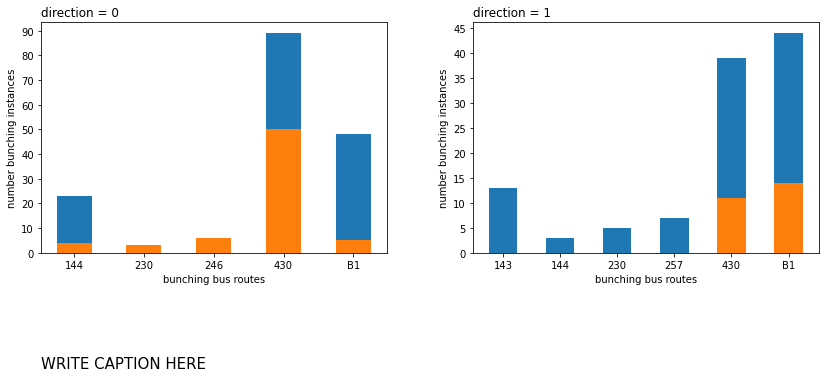

In [56]:
# Make a subplot for bunching on the routes, dividing informatio based on the 
# direction the bus is travelling. i.e. direction = 1 and direction = 0 in separate plots
fig, (ax1, ax2) = plt.subplots(1, 2)

# Plot direction = 0
ax1.bar(bunchingALL_df[bunchingALL_df['direction_number']==0]['route_short_name'],bunchingALL_df[bunchingALL_df['direction_number']==0]['bunching_instances'],label='Bunching anywhere on route',width=0.5)
ax1.bar(bunchingMTR_df[bunchingMTR_df['direction_number']==0]['route_short_name'],bunchingMTR_df[bunchingMTR_df['direction_number']==0]['bunching_instances'],label='Bunching on MTR',width=0.5)
ax1.set_xlabel('bunching bus routes')#,fontsize=15)
ax1.set_ylabel('number bunching instances')#,fontsize=15)
ax1.set_position([0,0.3, 0.8, 0.8])
ax1.set_title('direction = 0',loc='left')

# Plot direction = 1
ax2.bar(bunchingALL_df[bunchingALL_df['direction_number']==1]['route_short_name'],bunchingALL_df[bunchingALL_df['direction_number']==1]['bunching_instances'],label='Bunching anywhere on route',width=0.5)
ax2.bar(bunchingMTR_df[bunchingMTR_df['direction_number']==1]['route_short_name'],bunchingMTR_df[bunchingMTR_df['direction_number']==1]['bunching_instances'],label='Bunching on MTR',width=0.5)
ax2.set_xlabel('bunching bus routes')#,fontsize=15)
ax2.set_ylabel('number bunching instances')#,fontsize=15)
ax2.set_position([1,0.3, 0.8, 0.8])
ax2.set_title('direction = 1',loc='left')

# x- and y-axis tick formatting
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=0)
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0)
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))


txt="""WRITE CAPTION HERE"""
plt.figtext(0, -0.10, txt, wrap=False, horizontalalignment='left', fontsize=15)
#plt.tight_layout()

#plt.legend()
plt.show()

# Save the figure
#plt.savefig('FigureXXX.png',bbox_inches='tight')

In [57]:
# Part 3: aggregate bunching info based on route (ignoring direction)

In [58]:
#bunchingMTR_df.groupby('route_short_name').sum().reset_index()

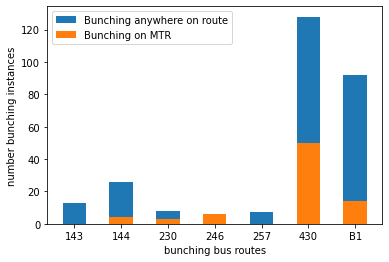

In [59]:
# Figure (b.3) ALL DATA TOGETHER -- BOTH DIRECTIONS
# Aggregate same route data into single row -- not split on directoin
bunchingALL_df_aggregated = bunchingALL_df.groupby('route_short_name').sum().reset_index()
bunchingMTR_df_aggregated = bunchingMTR_df.groupby('route_short_name').sum().reset_index()

plt.bar(bunchingALL_df_aggregated['route_short_name'],bunchingALL_df_aggregated['bunching_instances'],label='Bunching anywhere on route',width=0.5)
plt.bar(bunchingMTR_df['route_short_name'],bunchingMTR_df['bunching_instances'],label='Bunching on MTR',width=0.5)


#plt.xticks(ypos,categoricaldata['k'],rotation=0)
plt.xlabel('bunching bus routes')
plt.ylabel('number bunching instances')
plt.legend()

plt.show()
#bunchingMTR_df
#bunchingALL_df

#### At which stops on military are buses bunching AND what types of routes are bunching at these stops?

In [60]:
# PART 1: give the routes in study a 'route type' based on the code above for 'routesInStudy_df'

In [61]:
#len(route_characteristics_df)
#route_characteristics_df_condensed

In [62]:
#route_characteristics_df[route_characteristics_df['route_short_name']=='B1']

In [63]:
TUdf_master2 = pd.merge(TUdf_master,route_characteristics_df[['route_short_name','bus_type']], on = 'route_short_name', how = 'left')
TUdf_master2.head(3)
#TUdf_master2[TUdf_master2['route_short_name']=='B1']

,route_id,route_short_name,trip_id,stop_sequence,stop_id,direction_number,is_on_MTR,scheduled_arrival_time_dt,headway_nominal,arr_delay,dep_delay,arr_delay_td,dep_delay_td,actual_arrival_time_dt,headway_actual,bunching_0.25hwy,bunchingBehind_0.25hwy,bunching_0.3hwy,bus_infront_tripID,bus_type
0,26-257-sj2-1,257,1138086,1,206718,0.0,False,2020-05-08 08:22:00,00:18:00,0,0,0 days,0 days,2020-05-08 08:22:00,00:18:00,0.0,0.0,0.0,1138088.0,AS
1,26-257-sj2-1,257,1138087,1,206718,0.0,False,2020-05-08 08:42:00,00:20:00,0,0,0 days,0 days,2020-05-08 08:42:00,00:20:00,0.0,0.0,0.0,1138086.0,AS
2,26-257-sj2-1,257,1138040,1,206718,0.0,False,2020-05-08 09:02:00,00:20:00,0,0,0 days,0 days,2020-05-08 09:02:00,00:20:00,0.0,0.0,0.0,1138087.0,AS


In [64]:
#TUdf_master2

In [65]:
# PART 2: Stop Ordering and Aggregation

In [66]:
#stopsdf
stop_timesdf.head(3)

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,timepoint,stop_note
1716856,1135567,06:52:00,06:52:00,206718,1,NaN,0,1,0.00,1,NaN
1716857,1135567,06:53:00,06:53:00,206730,2,NaN,0,0,343.75,0,NaN
1716858,1135567,06:54:00,06:54:00,206731,3,NaN,0,0,513.20,0,NaN


In [67]:
# !!!Need to group bus stops that are very close!!!
# Need to group stops that are bunched together (i.e. stops that are at the same location)
# By considering a map of all the stops, only stops for direction_number = 1 buses need to be grouped

MTR_stopinfo_df = stopsdf[stopsdf['stop_id'].isin(stopslist)][['stop_id','stop_name','stop_lat','stop_lon']]

# Import the big directoin information - need to associate each stop with a trip direction at that stop


# Need to merge this on trip_id with stopsdf to get the direction_id of all the stops on military road
tripAndDirection_df = pd.read_pickle('Stop_and_Direction_Info_MTR.pkl')[['trip_id','direction_number']]
#tripAndDirection_df

# Merge 'tripAndDirection_df' and 'stop_timesdf[['trip_id','stop_id']]' to get a 'direction_number' for each stop
df_dmmy = pd.merge(tripAndDirection_df,stop_timesdf[['trip_id','stop_id']], on='trip_id', how='left')

# Merge ' MTR_stopinfo_df' with the dummy dataframe 'df_dmmy' to associate a direction number with the stops
directed_MTR_stops_df = pd.merge(MTR_stopinfo_df,df_dmmy, on='stop_id', how='left')

# Get a dataframe with just the unique stop ids and their direction number
directed_MTR_stops_df.drop_duplicates(subset='stop_id', keep='first', inplace=True)

# Manually put in direction ids for stops that still dont have direction ids
directed_MTR_stops_df.at[directed_MTR_stops_df[directed_MTR_stops_df.stop_id == '209020'].index[0], 'direction_number'] = 1
directed_MTR_stops_df.at[directed_MTR_stops_df[directed_MTR_stops_df.stop_id == '2088179'].index[0], 'direction_number'] = 0
directed_MTR_stops_df.at[directed_MTR_stops_df[directed_MTR_stops_df.stop_id == '2088177'].index[0], 'direction_number'] = 0
directed_MTR_stops_df.at[directed_MTR_stops_df[directed_MTR_stops_df.stop_id == '2088193'].index[0], 'direction_number'] = 1

# Sort direction number and then longitude numbers in decending to get the order of the stops in the order that
# a bus with direction_number = 1 would see them (this includes stops that they don't stop at).
directed_MTR_stops_df.sort_values(['direction_number','stop_lon'], ascending = (False,False)).reset_index(drop = True, inplace = True)

#directed_MTR_stops_df.head(3)

In [68]:
#directed_MTR_stops_df

In [69]:
# Make a dictionary for all the stops that require replacing
stops_to_replace_dict = {'208960':'208960','208911':'208960' , '208912':'208960',
                        '208944':'208944', '208913':'208944', '208914':'208944',
                        '208019':'209019', '209020':'209019'}
#stops_to_replace_dict

In [70]:
# Aggregate stops in master_df2 into an new dataframe
TUdf_master3 = TUdf_master2.copy()
TUdf_master3['stop_id'] = TUdf_master2['stop_id'].map(lambda x: stops_to_replace_dict[x] if x in stops_to_replace_dict else x)

In [71]:
#TUdf_master3

In [72]:
# PART 4: Associate bunching with stop ids along military road

# 1. Get the order of the buses in 'stopslist' for direction_number == 1 buses ()
# 2. Set this to a tuple

#Note: We will include some bus stops on Spit Road

In [73]:
# Aggregate stops in the 'directed_MTR_stops_df' dataframe
directedAggregated_MTR_stops_df = directed_MTR_stops_df.copy()
directedAggregated_MTR_stops_df['stop_id'] = directedAggregated_MTR_stops_df['stop_id'].map(lambda x: stops_to_replace_dict[x] if x in stops_to_replace_dict else x)

In [74]:
# Delete duplicate stop ids
# This will result in some stop_ids being incorrectly associated with the appropriate lat-lon values,
# but for the purposes of getting stop order along military for plotting it will not cause problems
directedAggregated_MTR_stops_df.drop_duplicates(subset='stop_id', keep='first', inplace=True)

# Get the order of the stops for buses going in direction 1 (i.e. buses headed SW)
dir1_StopTuple = tuple(directedAggregated_MTR_stops_df[directedAggregated_MTR_stops_df['direction_number'] == 1].sort_values('stop_lon', ascending = False)['stop_id'].tolist())
stopOrderDir1_df = pd.DataFrame({'stop_number': list(range(len(dir1_StopTuple))), 'stop_id':dir1_StopTuple})
#stopOrderDir1_df

# Get the order of the stops for buses going in direction 0 (i.e. buses headed NE)
# In this case longitude decreases going along military road with a NE heading
dir0_StopTuple = tuple(directedAggregated_MTR_stops_df[directedAggregated_MTR_stops_df['direction_number'] == 0].sort_values('stop_lon', ascending = True)['stop_id'].tolist())
stopOrderDir0_df = pd.DataFrame({'stop_number': list(range(len(dir0_StopTuple))), 'stop_id':dir0_StopTuple})
#stopOrderDir0_df

stopOrder_df = pd.concat([stopOrderDir1_df, stopOrderDir0_df], axis = 0, ignore_index=True)
#stopOrder_df

In [75]:
TUdf_master3.head(2)

,route_id,route_short_name,trip_id,stop_sequence,stop_id,direction_number,is_on_MTR,scheduled_arrival_time_dt,headway_nominal,arr_delay,dep_delay,arr_delay_td,dep_delay_td,actual_arrival_time_dt,headway_actual,bunching_0.25hwy,bunchingBehind_0.25hwy,bunching_0.3hwy,bus_infront_tripID,bus_type
0,26-257-sj2-1,257,1138086,1,206718,0.0,False,2020-05-08 08:22:00,00:18:00,0,0,0 days,0 days,2020-05-08 08:22:00,00:18:00,0.0,0.0,0.0,1138088.0,AS
1,26-257-sj2-1,257,1138087,1,206718,0.0,False,2020-05-08 08:42:00,00:20:00,0,0,0 days,0 days,2020-05-08 08:42:00,00:20:00,0.0,0.0,0.0,1138086.0,AS


In [76]:
# Count the number of bunching instance occuring at each stop on MTR. Split them based on their direction.
bunchingMTR_bystopID_df = TUdf_master3[(TUdf_master3['stop_id'].isin(stopslist)) & (TUdf_master3['bunching_0.25hwy'] ==1)].groupby(['direction_number','stop_id']).count()['trip_id'].reset_index()
bunchingMTR_bystopID_df.rename({'trip_id': 'bunching_instances_AtEachStop'},axis=1,inplace=True)
bunchingMTR_bystopID_df

,direction_number,stop_id,bunching_instances_AtEachStop
0,0.0,2088176,8
1,0.0,2088178,9
2,0.0,208818,7
3,0.0,2088180,2
4,0.0,208845,5
5,0.0,208846,5
6,0.0,208847,5
7,0.0,208848,6
8,0.0,208947,3
9,0.0,208948,8


In [77]:
bunchingMTR_bystopID_df2 = pd.merge(bunchingMTR_bystopID_df,stopOrder_df, on = 'stop_id', how = 'left')
bunchingMTR_bystopID_df2.sort_values(['direction_number','stop_number'], ascending = True,inplace=True)

In [78]:
bunchingMTR_bystopID_df2

,direction_number,stop_id,bunching_instances_AtEachStop,stop_number
8,0.0,208947,3,0
9,0.0,208948,8,1
10,0.0,209021,4,2
11,0.0,209058,6,3
0,0.0,2088176,8,4
1,0.0,2088178,9,6
2,0.0,208818,7,8
3,0.0,2088180,2,9
4,0.0,208845,5,10
5,0.0,208846,5,11


In [79]:
# Part 5: Make Plots for Figure C

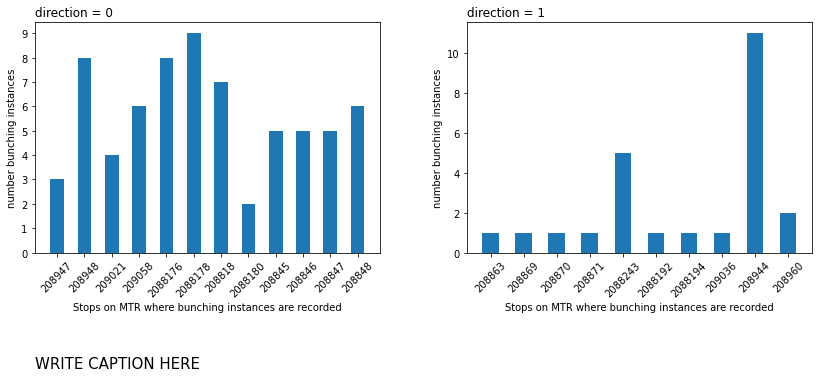

In [80]:
# Plot all buses together for direction = 1 and direction = 0 in separate plots
fig, (ax1, ax2) = plt.subplots(1, 2)

# Plot direction = 0
ax1.bar(bunchingMTR_bystopID_df2[bunchingMTR_bystopID_df2['direction_number']==0]['stop_id'],bunchingMTR_bystopID_df2[bunchingMTR_bystopID_df2['direction_number']==0]['bunching_instances_AtEachStop'],label='Bunching along MTR',width=0.5)
ax1.set_xlabel('Stops on MTR where bunching instances are recorded')#,fontsize=15)
ax1.set_ylabel('number bunching instances')#,fontsize=15)
ax1.set_position([0,0.3, 0.8, 0.8])
ax1.set_title('direction = 0',loc='left')

# Plot direction = 1
ax2.bar(bunchingMTR_bystopID_df2[bunchingMTR_bystopID_df2['direction_number']==1]['stop_id'],bunchingMTR_bystopID_df2[bunchingMTR_bystopID_df2['direction_number']==1]['bunching_instances_AtEachStop'],label='Bunching along MTR',width=0.5)
ax2.set_xlabel('Stops on MTR where bunching instances are recorded')#,fontsize=15)
ax2.set_ylabel('number bunching instances')#,fontsize=15)
ax2.set_position([1,0.3, 0.8, 0.8])
ax2.set_title('direction = 1',loc='left')

# x- and y-axis tick formatting
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))


txt="""WRITE CAPTION HERE"""
plt.figtext(0, -0.10, txt, wrap=False, horizontalalignment='left', fontsize=15)
#plt.tight_layout()

plt.show()

# Save the figure
#plt.savefig('FigureXXX.png',bbox_inches='tight')


In [81]:
# Divide the bunching instances at each stop based on bus_type

In [82]:
# Count the number of bunching instance occuring at each stop on MTR. Split them based on their direction.
bunchingMTR_bystopIDbyBusType_df = TUdf_master3[(TUdf_master3['stop_id'].isin(stopslist)) & (TUdf_master3['bunching_0.25hwy'] == 1)].groupby(['direction_number','stop_id','bus_type']).count()['trip_id'].reset_index()
bunchingMTR_bystopIDbyBusType_df.rename({'trip_id': 'bunching_instances_AtEachStop'},axis=1,inplace=True)
#bunchingMTR_bystopIDbyBusType_df

In [83]:
bunchingMTR_bystopIDbyBusType_df

,direction_number,stop_id,bus_type,bunching_instances_AtEachStop
0,0.0,2088176,AS,8
1,0.0,2088178,AS,9
2,0.0,208818,AS,7
3,0.0,2088180,AS,1
4,0.0,2088180,EX,1
5,0.0,208845,AS,5
6,0.0,208846,AS,5
7,0.0,208847,AS,5
8,0.0,208848,AS,6
9,0.0,208947,AS,3


In [84]:
bunchingMTR_bystopIDbyBusType_df2 = pd.merge(bunchingMTR_bystopIDbyBusType_df,stopOrder_df, on = 'stop_id', how = 'left')
bunchingMTR_bystopIDbyBusType_df2.sort_values(['direction_number','stop_number'], ascending = True,inplace=True)

In [85]:
bunchingMTR_bystopIDbyBusType_df2

,direction_number,stop_id,bus_type,bunching_instances_AtEachStop,stop_number
9,0.0,208947,AS,3,0
10,0.0,208948,AS,4,1
11,0.0,208948,EX,4,1
12,0.0,209021,AS,4,2
13,0.0,209058,AS,6,3
0,0.0,2088176,AS,8,4
1,0.0,2088178,AS,9,6
2,0.0,208818,AS,7,8
3,0.0,2088180,AS,1,9
4,0.0,2088180,EX,1,9


In [86]:
# Plot buses based on bus_type for direction = 1 and direction = 0 in separate plots
'''
# Plot buses based on bus_type for direction = 1 and direction = 0 in separate plots
# Use a stacked bar chart
# Plot all buses together for direction = 1 and direction = 0 in separate plots
fig, (ax1, ax2) = plt.subplots(1, 2)


# Plot direction = 0
ax1.bar(bunchingMTR_bystopIDbyBusType_df2[(bunchingMTR_bystopIDbyBusType_df2['direction_number']==0)&(bunchingMTR_bystopIDbyBusType_df2['bus_type'] == 'AS')]['stop_id'], bunchingMTR_bystopIDbyBusType_df2[(bunchingMTR_bystopIDbyBusType_df2['direction_number']==0)&(bunchingMTR_bystopIDbyBusType_df2['bus_type'] == 'AS')]['bunching_instances_AtEachStop'],label='Bunching along MTR',width=0.5)
ax1.bar(bunchingMTR_bystopIDbyBusType_df2[(bunchingMTR_bystopIDbyBusType_df2['direction_number']==0)&(bunchingMTR_bystopIDbyBusType_df2['bus_type'] == 'EX')]['stop_id'], bunchingMTR_bystopIDbyBusType_df2[(bunchingMTR_bystopIDbyBusType_df2['direction_number']==0)&(bunchingMTR_bystopIDbyBusType_df2['bus_type'] == 'EX')]['bunching_instances_AtEachStop'],bottom = bunchingMTR_bystopIDbyBusType_df2[(bunchingMTR_bystopIDbyBusType_df2['direction_number']==1)&(bunchingMTR_bystopIDbyBusType_df2['bus_type'] == 'AS')]['bunching_instances_AtEachStop'] ,label='Bunching along MTR',width=0.5)
#ax1.bar(bunchingMTR_bystopIDbyBusType_df2[bunchingMTR_bystopIDbyBusType_df2['direction_number']==0]['stop_id'],bunchingMTR_bystopIDbyBusType_df2[bunchingMTR_bystopIDbyBusType_df2['direction_number']==0]['bunching_instances_AtEachStop'],label='Bunching along MTR',width=0.5)
ax1.set_xlabel('Stops on MTR where bunching instances are recorded')#,fontsize=15)
ax1.set_ylabel('number bunching instances')#,fontsize=15)
ax1.set_position([0,0.3, 0.8, 0.8])
ax1.set_title('direction = 0',loc='left')


# Plot direction = 1
ax2.bar(bunchingMTR_bystopIDbyBusType_df2[(bunchingMTR_bystopIDbyBusType_df2['direction_number']==1)&(bunchingMTR_bystopIDbyBusType_df2['bus_type'] == 'AS')]['stop_id'], bunchingMTR_bystopIDbyBusType_df2[(bunchingMTR_bystopIDbyBusType_df2['direction_number']==1)&(bunchingMTR_bystopIDbyBusType_df2['bus_type'] == 'AS')]['bunching_instances_AtEachStop'],label='Bunching along MTR',width=0.5)
ax2.bar(bunchingMTR_bystopIDbyBusType_df2[(bunchingMTR_bystopIDbyBusType_df2['direction_number']==1)&(bunchingMTR_bystopIDbyBusType_df2['bus_type'] == 'EX')]['stop_id'], bunchingMTR_bystopIDbyBusType_df2[(bunchingMTR_bystopIDbyBusType_df2['direction_number']==1)&(bunchingMTR_bystopIDbyBusType_df2['bus_type'] == 'EX')]['bunching_instances_AtEachStop'],bottom = bunchingMTR_bystopIDbyBusType_df2[(bunchingMTR_bystopIDbyBusType_df2['direction_number']==1)&(bunchingMTR_bystopIDbyBusType_df2['bus_type'] == 'AS')]['bunching_instances_AtEachStop'] ,label='Bunching along MTR',width=0.5)
#ax2.bar(bunchingMTR_bystopIDbyBusType_df2[bunchingMTR_bystopIDbyBusType_df2['direction_number']==1]['stop_id'],bunchingMTR_bystopIDbyBusType_df2[bunchingMTR_bystopIDbyBusType_df2['direction_number']==1]['bunching_instances_AtEachStop'],label='Bunching along MTR',width=0.5)
ax2.set_xlabel('Stops on MTR where bunching instances are recorded')#,fontsize=15)
ax2.set_ylabel('number bunching instances')#,fontsize=15)
ax2.set_position([1,0.3, 0.8, 0.8])
ax2.set_title('direction = 1',loc='left')

# x- and y-axis tick formatting
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0)
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))


txt="""WRITE CAPTION HERE"""
plt.figtext(0, -0.10, txt, wrap=False, horizontalalignment='left', fontsize=15)
#plt.tight_layout()

plt.show()

# Save the figure
#plt.savefig('FigureXXX.png',bbox_inches='tight')
'''

'\n# Plot buses based on bus_type for direction = 1 and direction = 0 in separate plots\n# Use a stacked bar chart\n# Plot all buses together for direction = 1 and direction = 0 in separate plots\nfig, (ax1, ax2) = plt.subplots(1, 2)\n\n\n# Plot direction = 0\nax1.bar(bunchingMTR_bystopIDbyBusType_df2[(bunchingMTR_bystopIDbyBusType_df2[\'direction_number\']==0)&(bunchingMTR_bystopIDbyBusType_df2[\'bus_type\'] == \'AS\')][\'stop_id\'], bunchingMTR_bystopIDbyBusType_df2[(bunchingMTR_bystopIDbyBusType_df2[\'direction_number\']==0)&(bunchingMTR_bystopIDbyBusType_df2[\'bus_type\'] == \'AS\')][\'bunching_instances_AtEachStop\'],label=\'Bunching along MTR\',width=0.5)\nax1.bar(bunchingMTR_bystopIDbyBusType_df2[(bunchingMTR_bystopIDbyBusType_df2[\'direction_number\']==0)&(bunchingMTR_bystopIDbyBusType_df2[\'bus_type\'] == \'EX\')][\'stop_id\'], bunchingMTR_bystopIDbyBusType_df2[(bunchingMTR_bystopIDbyBusType_df2[\'direction_number\']==0)&(bunchingMTR_bystopIDbyBusType_df2[\'bus_type\'] == \'EX

In [87]:
'''df = bunchingMTR_bystopIDbyBusType_df2[bunchingMTR_bystopIDbyBusType_df2['direction_number']==1].copy()
df.drop(['direction_number','stop_number'], axis =1,inplace=True)'''

"df = bunchingMTR_bystopIDbyBusType_df2[bunchingMTR_bystopIDbyBusType_df2['direction_number']==1].copy()\ndf.drop(['direction_number','stop_number'], axis =1,inplace=True)"

In [88]:
'''x= df
y= x.set_index('stop_id')
z=y#.groupby(['stop_id','bus_type']).sum()

z.plot.bar(stacked=True)'''

"x= df\ny= x.set_index('stop_id')\nz=y#.groupby(['stop_id','bus_type']).sum()\n\nz.plot.bar(stacked=True)"

In [89]:
#y

#### Count 'nearby' Bunching Instances

Objectives: 
- Do this with decimal values for 'nearby bunching' instances (ignore this initially)
- produce df to be exported and implemented in LOGIT-regression model

Bunching will be considered ahead if there was or will be a bunching incident at that stop 2 minutes either side of each bus' arrival

NOTE: Now we are only interested in what happens on MTR

In [90]:
TUdf_masterMTR = TUdf_master3[TUdf_master3['stop_id'].isin(stopslist)].copy()
TUdf_masterMTR.reset_index(drop=True, inplace=True)
#TUdf_masterMTR

In [91]:
# Considering buses that are ALMOST BUNCHING - this is to account for significant delays and buses that might bunch 
# on stops that are between the stops of the bus that we're looking at.

# That is, assign a decimal value for a situation that is almost a bunching instance.
# If the actual headway is between two 'critical values' of the nominal headway a number between 0 and 1
# will be assigned to the 'almost bunching' situation.
# It will be assumed that the boundary of the critical values is between 0.25h_nom and 0.5h_nom.
# Assume that the probability of bunching is linearly related to the headway between 0.25h_nom and 0.5h_nom.
# Say the value to assign is 'y', then y = (0.5h_nom - h_actual)/(0.5h_nom-0.25h_nom)



In [92]:
# Convert headways to floats in minutes for working - save these values to new columns
TUdf_masterMTR['headway_nominal_mins'] = pd.to_numeric(TUdf_masterMTR['headway_nominal'].dt.seconds, downcast='integer')/60
TUdf_masterMTR['headway_actual_mins'] = pd.to_numeric(TUdf_masterMTR['headway_actual'].dt.seconds, downcast='integer')/60

In [93]:
# Get a number that makes the change from 'bunching' to 'not bunching' continuous when the headway is between
# 0.25h_nom and 0.5h_nom.

#TUdf_master[TUdf_master['add_delay_incurred']==True]

y = np.where(TUdf_masterMTR['headway_nominal_mins'].isin([0]),0,(0.5*TUdf_masterMTR['headway_nominal_mins']-TUdf_masterMTR['headway_actual_mins'])/(0.25*TUdf_masterMTR['headway_nominal_mins']).tolist())

TUdf_masterMTR['almostAndIs_bunching_0.25hwy'] = np.where((y>0) & (y < 1), y, TUdf_masterMTR['bunching_0.25hwy'])


# The degree of bunching is defined by a ellipse that is 0 when the actual headway is greater than 0.50*h_nom and 
# 1 where actual headway is 0.
x =TUdf_masterMTR['headway_actual_mins']#.values.tolist()
alpha = 0.5*TUdf_masterMTR['headway_nominal_mins']
y2 = np.where((TUdf_masterMTR['headway_nominal_mins'].isin([0])) | (TUdf_masterMTR['headway_nominal_mins'] < x),0, np.sqrt(1-(x/alpha)**2) ).tolist()
TUdf_masterMTR['degree_of_bunching'] = np.where((y>=0) & (y <= 1), y, 0)

/usr/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [94]:
#TUdf_masterMTR

In [95]:
# Initialise a column for storing the nearby bunching incidents
#TUdf_masterMTR['nearby_bunch_count'] = np.nan

TUdf_masterMTR['nearby_bunch_count_discrete'] = np.nan
TUdf_masterMTR['nearby_bunch_count_cts'] = np.nan
TUdf_masterMTR['nearby_bunch_count_DOB'] = np.nan

#TUdf_master3

In [96]:
# Go through the dataframe and at each row look forward and backward 2 mins (wrt arrival time) and check if 
# there was a bunching incident. If there was a bunching incident, record it by summing it to the total 
# number of bunching incidents recorded at that point.

# index list to iterate through
index_nums = TUdf_masterMTR.index.values.tolist()


# Horizon to look for bunching before/after bus arrival
bunching_horizon_ahead = dt.timedelta(seconds = 120)
bunching_horizon_behind = dt.timedelta(seconds = 180)

for i in index_nums:
    
    # Reset bunch counts
    bunchCount_disc = 0
    bunchCount_cts = 0
    bunchCount_deg = 0
    
    # Get all the rows in the 'TUdf_masterMTR' dataframe for buses at the same stop as this bus that 
    # were at this stop within 2 minutes of the bus we're looking at
    thisStop = TUdf_masterMTR.at[i,'stop_id']
    thisArrivalTime = TUdf_masterMTR.at[i, 'actual_arrival_time_dt']
    thisRoute = TUdf_masterMTR.at[i, 'route_short_name']
    
    
    
    # Count the number of bunching instances that occured within 2 minutes of the arrival of this bus
    # Note: We're looking at the effect of other routes on this route so we need to only look at other routes.
    bunchCount_disc = TUdf_masterMTR[(TUdf_masterMTR['route_short_name'] == '430') & (TUdf_masterMTR['route_short_name']!=thisRoute) & (TUdf_masterMTR['stop_id']==thisStop) & (TUdf_masterMTR['actual_arrival_time_dt'] <= thisArrivalTime + bunching_horizon_behind) & (TUdf_masterMTR['actual_arrival_time_dt'] >= thisArrivalTime - bunching_horizon_ahead)]['bunching_0.25hwy'].sum()
    bunchCount_cts = TUdf_masterMTR[(TUdf_masterMTR['route_short_name'] == '430') & (TUdf_masterMTR['route_short_name']!=thisRoute) &(TUdf_masterMTR['stop_id']==thisStop) & (TUdf_masterMTR['actual_arrival_time_dt'] <= thisArrivalTime + bunching_horizon_behind) & (TUdf_masterMTR['actual_arrival_time_dt'] >= thisArrivalTime - bunching_horizon_ahead)]['almostAndIs_bunching_0.25hwy'].sum()
    bunchCount_deg = TUdf_masterMTR[(TUdf_masterMTR['route_short_name'] == '430') & (TUdf_masterMTR['route_short_name']!=thisRoute) &(TUdf_masterMTR['stop_id']==thisStop) & (TUdf_masterMTR['actual_arrival_time_dt'] <= thisArrivalTime + bunching_horizon_behind) & (TUdf_masterMTR['actual_arrival_time_dt'] >= thisArrivalTime - bunching_horizon_ahead)]['degree_of_bunching'].sum()
    
    
    # Count the number of bunching instances (using .groupby()?) 
    # Note: what happens if groupby returns nothing? Do we get 'NaN' back or '0'?

    
    # If this bus is bunching we need to remove 1 from the bunch count 
    #if TUdf_masterMTR.iloc[i]['bunching_0.25hwy'] == 1:
    #    bunchCount += -1
    
    
    # Assign the number of bunching instances to the 'nearby_bunch_count' column
    TUdf_masterMTR.at[i, 'nearby_bunch_count_discrete'] = bunchCount_disc
    TUdf_masterMTR.at[i, 'nearby_bunch_count_cts'] = bunchCount_cts
    TUdf_masterMTR.at[i, 'nearby_bunch_count_DOB'] = bunchCount_deg
    

    
    del(bunchCount_disc)
    del(bunchCount_cts)
    del(bunchCount_deg)
    
    

In [97]:
#TUdf_masterMTR[TUdf_masterMTR['nearby_bunch_count'].isnull()==False]#.head(3)

In [98]:
# Calculate net change in delay at a stop
TUdf_masterMTR['delay_change'] = TUdf_masterMTR['dep_delay'] - TUdf_masterMTR['arr_delay']
TUdf_masterMTR['delay_change_td'] = TUdf_masterMTR['dep_delay_td'] - TUdf_masterMTR['arr_delay_td']

# A positive change in delay indicates that the bus is being slowed down - i.e. the bus has spent longer than it is scheduled
# at a particular stop - this is independent on if the bus is overall early or late. However, it represents whether the bus
# is moving towards a bunching condition or away from a bunching condition

In [99]:
# Filter out all the rows that dont have any nearby bunching - these rows will still have a '0' in the 
# 'nearby_bunch_count' column.

# We are only interested in what happens to the other buses that are near the bunching buses.
# In particular, we want to know if they're beginning to bunch with the buses behind them.

# Only want info where there was an encounter.
TUdf_masterMTR_disc = TUdf_masterMTR[(TUdf_masterMTR['nearby_bunch_count_discrete'].isin([0])==False)]# &(TUdf_masterMTR['bunching_0.25hwy'].isin([0])==True)]
TUdf_masterMTR_cts = TUdf_masterMTR[(TUdf_masterMTR['nearby_bunch_count_cts'].isin([0])==False)]# &(TUdf_masterMTR['bunching_0.25hwy'].isin([0])==True)]

TUdf_masterMTR_deg = TUdf_masterMTR[(TUdf_masterMTR['nearby_bunch_count_DOB'].isin([0])==False)]
#TUdf_masterMTR

print(len(TUdf_masterMTR))
print(len(TUdf_masterMTR_disc))
print(len(TUdf_masterMTR_cts))
print(len(TUdf_masterMTR_deg))


11226
213
413
224


# Export Data - It is ready for plotting

In [100]:
pathname_HOME = '/home'
group = 'Group1'
filename_df_TU_Group1_disc = 'TUdf_masterMTR_' + group + '_disc.pkl'
filename_df_TU_Group1_cts = 'TUdf_masterMTR_' + group + '_cts.pkl'
filename_df_TU_Group1_deg = 'TUdf_masterMTR_' + group + '_deg.pkl'

# SAVE AS PICKLE FILE TO PRESERVE DTYPES:
TUdf_masterMTR_disc.to_pickle(os.path.join(pathname_HOME, filename_df_TU_Group1_disc))
TUdf_masterMTR_cts.to_pickle(os.path.join(pathname_HOME, filename_df_TU_Group1_cts))
TUdf_masterMTR_deg.to_pickle(os.path.join(pathname_HOME, filename_df_TU_Group1_deg))

In [101]:
#TUdf_masterMTR_deg

# Import Data - For plotting

In [102]:
pathname_HOME = '/home'
group = 'Group1'
filename_df_TU_Group1_disc = 'TUdf_masterMTR_' + group + '_disc.pkl'
filename_df_TU_Group1_cts = 'TUdf_masterMTR_' + group + '_cts.pkl'
filename_df_TU_Group1_deg = 'TUdf_masterMTR_' + group + '_deg.pkl'

# SAVE AS PICKLE FILE TO PRESERVE DTYPES:
TUdf_masterMTR_disc = pd.read_pickle(pathname_HOME+'/'+filename_df_TU_Group1_disc)
TUdf_masterMTR_cts = pd.read_pickle(pathname_HOME+'/'+filename_df_TU_Group1_cts)
TUdf_masterMTR_deg = pd.read_pickle(pathname_HOME+'/'+filename_df_TU_Group1_deg)

## Plots from sample of data - to answer research question
Aggregate all data to this in 'logit regression model' file

Make THREE plots from above information
1. Scatter Plot - Figure (e.2) - # Probability of bunching with bus behind vs # bunching instances ahead
2. Histogram showing change in delay (in seconds) for buses encountering bunched buses
3. Scatter plot showng # nearby bunching instances vs change in delay for buses encountering bunched buses


### Plot 1 (Figure (E)(1,2))

Make scatter plot showing Probability of bunching w/ bus behind vs nearby bunching instances of other routes

Plot 'nearby_bunch_count_cts' vs 'bunchingBehind_0.25hwy'

Make Plot for each Direction

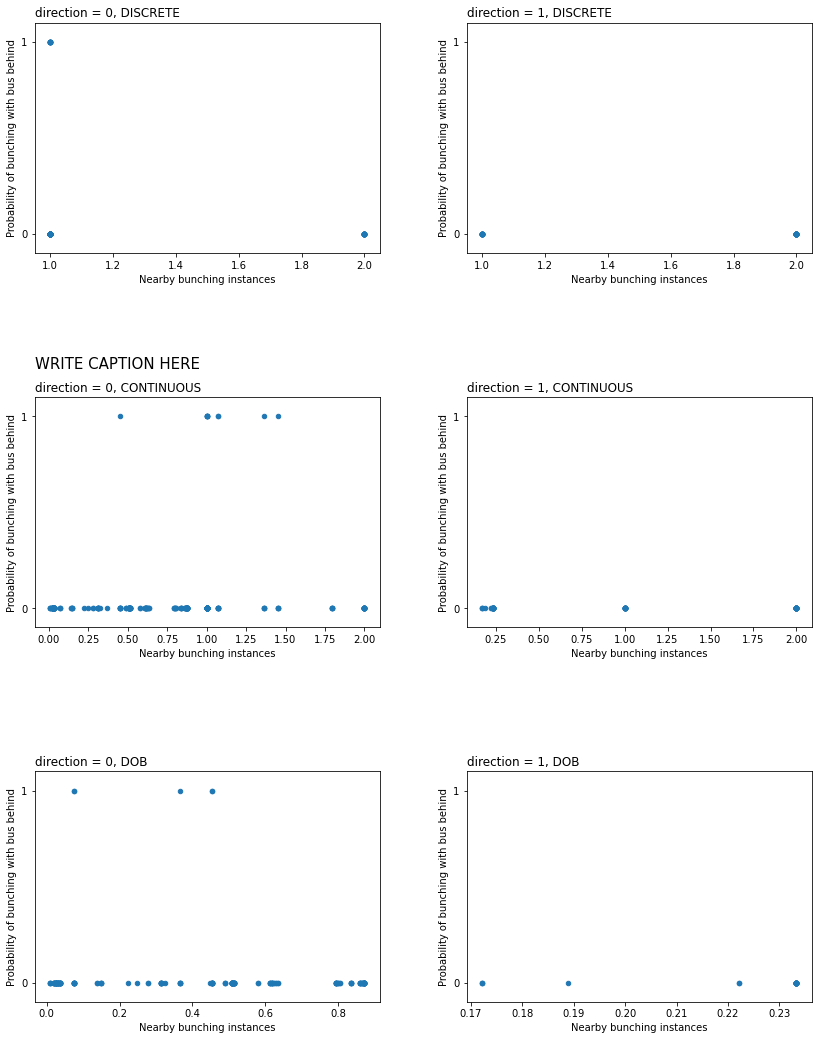

In [103]:
# LOGIT WITH 'DISCRETE, CONTINUOUS AND DOB NEARBY BUNCHING COUNT'

# HISTOGRAM WITH 'DISCRETE NEARBY BUNCHING '
# Plot all buses together for direction = 1 and direction = 0 in separate plots
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)

# DISCRETE:
# Plot direction = 0
ax1.scatter(TUdf_masterMTR_disc[TUdf_masterMTR_disc['direction_number']==0]['nearby_bunch_count_discrete'],TUdf_masterMTR_disc[TUdf_masterMTR_disc['direction_number']==0]['bunchingBehind_0.25hwy'],s=20)
ax1.set_xlabel('Nearby bunching instances')#,fontsize=15)
ax1.set_ylabel('Probability of bunching with bus behind')#,fontsize=15)
ax1.set_position([0,0.3, 0.8, 0.8])
ax1.set_title('direction = 0, DISCRETE',loc='left')

# Plot direction = 1
ax2.scatter(TUdf_masterMTR_disc[TUdf_masterMTR_disc['direction_number']==1]['nearby_bunch_count_discrete'], TUdf_masterMTR_disc[TUdf_masterMTR_disc['direction_number']==1]['bunchingBehind_0.25hwy'],s=20)
ax2.set_xlabel('Nearby bunching instances')#,fontsize=15)
ax2.set_ylabel('Probability of bunching with bus behind')#,fontsize=15)
ax2.set_position([1,0.3, 0.8, 0.8])
ax2.set_title('direction = 1, DISCRETE',loc='left')

# CONTINUOUS:
# Plot direction = 0
ax3.scatter(TUdf_masterMTR_cts[TUdf_masterMTR_cts['direction_number']==0]['nearby_bunch_count_cts'],TUdf_masterMTR_cts[TUdf_masterMTR_cts['direction_number']==0]['bunchingBehind_0.25hwy'],s=20)
ax3.set_xlabel('Nearby bunching instances')#,fontsize=15)
ax3.set_ylabel('Probability of bunching with bus behind')#,fontsize=15)
ax3.set_position([0,-1, 0.8, 0.8])
ax3.set_title('direction = 0, CONTINUOUS',loc='left')

# Plot direction = 1
ax4.scatter(TUdf_masterMTR_cts[TUdf_masterMTR_cts['direction_number']==1]['nearby_bunch_count_cts'], TUdf_masterMTR_cts[TUdf_masterMTR_cts['direction_number']==1]['bunchingBehind_0.25hwy'],s=20)
ax4.set_xlabel('Nearby bunching instances')#,fontsize=15)
ax4.set_ylabel('Probability of bunching with bus behind')#,fontsize=15)
ax4.set_position([1,-1, 0.8, 0.8])
ax4.set_title('direction = 1, CONTINUOUS',loc='left')

# DEGREE OF BUNCHING:
# Plot direction = 0
ax5.scatter(TUdf_masterMTR_deg[TUdf_masterMTR_deg['direction_number']==0]['nearby_bunch_count_DOB'],TUdf_masterMTR_deg[TUdf_masterMTR_deg['direction_number']==0]['bunchingBehind_0.25hwy'],s=20)
ax5.set_xlabel('Nearby bunching instances')#,fontsize=15)
ax5.set_ylabel('Probability of bunching with bus behind')#,fontsize=15)
ax5.set_position([0,-2.3, 0.8, 0.8])
ax5.set_title('direction = 0, DOB',loc='left')

# Plot direction = 1
ax6.scatter(TUdf_masterMTR_deg[TUdf_masterMTR_deg['direction_number']==1]['nearby_bunch_count_DOB'], TUdf_masterMTR_deg[TUdf_masterMTR_deg['direction_number']==1]['bunchingBehind_0.25hwy'],s=20)
ax6.set_xlabel('Nearby bunching instances')#,fontsize=15)
ax6.set_ylabel('Probability of bunching with bus behind')#,fontsize=15)
ax6.set_position([1,-2.3, 0.8, 0.8])
ax6.set_title('direction = 1, DOB',loc='left')


# x- and y-axis tick formatting
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=0)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=0)
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=0)
plt.setp(ax5.xaxis.get_majorticklabels(), rotation=0)
plt.setp(ax6.xaxis.get_majorticklabels(), rotation=0)

ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))
ax3.yaxis.set_major_locator(MaxNLocator(integer=True))
ax4.yaxis.set_major_locator(MaxNLocator(integer=True))
ax5.yaxis.set_major_locator(MaxNLocator(integer=True))
ax6.yaxis.set_major_locator(MaxNLocator(integer=True))

# Set plot limits
ax1.set_ylim([-0.1,1.1])
ax2.set_ylim([-0.1,1.1])
ax3.set_ylim([-0.1,1.1])
ax4.set_ylim([-0.1,1.1])
ax5.set_ylim([-0.1,1.1])
ax6.set_ylim([-0.1,1.1])



txt="""WRITE CAPTION HERE"""
plt.figtext(0, -0.10, txt, wrap=False, horizontalalignment='left', fontsize=15)
#plt.tight_layout()

plt.show()

# Save the figure
#plt.savefig('FigureXXX.png',bbox_inches='tight')




In [104]:
#TUdf_masterMTR[TUdf_masterMTR['nearby_bunch_count_discrete']!=0].head()

### Plot 2 (Figure (Ga)(1,2), (Gb)(1,2))
Histogram showing change in delay (in seconds) for buses encountering bunched buses

For each direction, make two plots: (4 plots total) 
- 1. histogram shows the distribution of the change in delay (in seconds) of buses that encounter other bunching buses of different routes
- 2. histogram shows the distribution of the change in delay (in seconds) of buses that DO NOT encounter other bunching buses of different routes

Note: This ignores the effect of timing points

In [105]:
#TUdf_masterMTR_disc
#TUdf_masterMTR_cts
#TUdf_masterMTR_deg

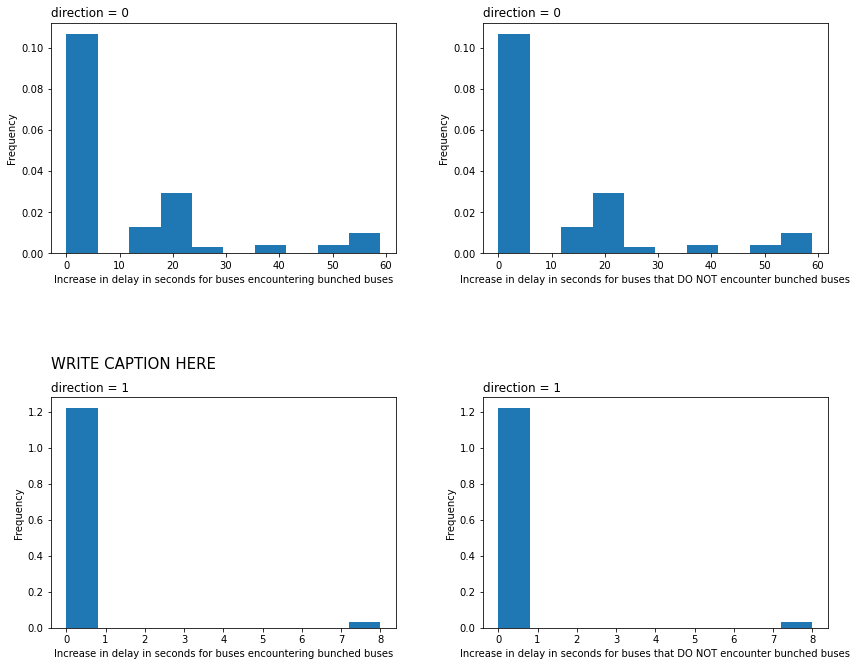

In [106]:
# HISTOGRAM WITH 'DISCRETE NEARBY BUNCHING '
# Plot all buses together for direction = 1 and direction = 0 in separate plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

# Plot direction = 0, buses that encounter bunched buses
ax1.hist(TUdf_masterMTR_disc[(TUdf_masterMTR_disc['direction_number']==0)]['delay_change'], bins = 10, density=True)
ax1.set_xlabel('Increase in delay in seconds for buses encountering bunched buses')#,fontsize=15)
ax1.set_ylabel('Frequency')#,fontsize=15)
ax1.set_position([0,0.3, 0.8, 0.8])
ax1.set_title('direction = 0',loc='left')

# Plot direction = 0, buses that DO NOT encounter bunched buses
ax2.hist(TUdf_masterMTR_disc[(TUdf_masterMTR_disc['direction_number']==0)]['delay_change'], bins = 10, density=True)
ax2.set_xlabel('Increase in delay in seconds for buses that DO NOT encounter bunched buses')#,fontsize=15)
ax2.set_ylabel('Frequency')#,fontsize=15)
ax2.set_position([1,0.3, 0.8, 0.8])
ax2.set_title('direction = 0',loc='left')

# Plot direction = 1, buses that encounter bunched buses
ax3.hist(TUdf_masterMTR_disc[(TUdf_masterMTR_disc['direction_number']==1)]['delay_change'], bins = 10, density=True)
ax3.set_xlabel('Increase in delay in seconds for buses encountering bunched buses')#,fontsize=15)
ax3.set_ylabel('Frequency')#,fontsize=15)
ax3.set_position([0,-1, 0.8, 0.8])
ax3.set_title('direction = 1',loc='left')

# Plot direction = 1, buses that DO NOT encounter bunched buses
ax4.hist(TUdf_masterMTR_disc[(TUdf_masterMTR_disc['direction_number']==1)]['delay_change'], bins = 10, density=True)
ax4.set_xlabel('Increase in delay in seconds for buses that DO NOT encounter bunched buses')#,fontsize=15)
ax4.set_ylabel('Frequency')#,fontsize=15)
ax4.set_position([1,-1, 0.8, 0.8])
ax4.set_title('direction = 1',loc='left')

# x- and y-axis tick formatting
#plt.setp(ax1.xaxis.get_majorticklabels(), rotation=0)
#ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
#plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0)
#ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

# Set plot limits
#ax1.set_ylim([-0.1,1.1])
#ax2.set_ylim([-0.1,1.1])

txt="""WRITE CAPTION HERE"""
plt.figtext(0, -0.10, txt, wrap=False, horizontalalignment='left', fontsize=15)
#plt.tight_layout()

plt.show()

# Save the figure
#plt.savefig('FigureXXX.png',bbox_inches='tight')

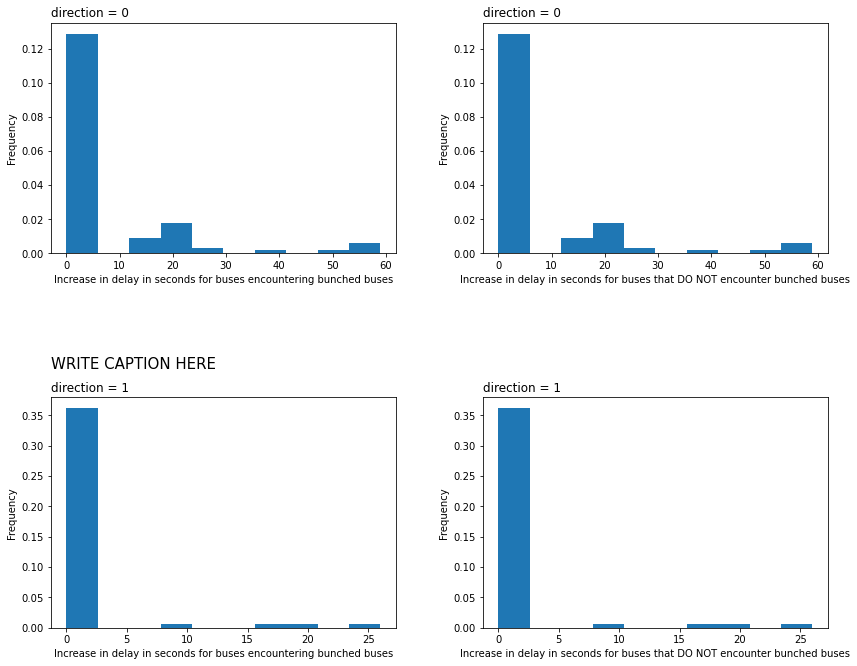

In [107]:
# HISTOGRAM WITH 'CONTINUOUS NEARBY BUNCHING '
# Plot all buses together for direction = 1 and direction = 0 in separate plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

# Plot direction = 0, buses that encounter bunched buses
ax1.hist(TUdf_masterMTR_cts[(TUdf_masterMTR_cts['direction_number']==0)]['delay_change'], bins = 10, density=True)
ax1.set_xlabel('Increase in delay in seconds for buses encountering bunched buses')#,fontsize=15)
ax1.set_ylabel('Frequency')#,fontsize=15)
ax1.set_position([0,0.3, 0.8, 0.8])
ax1.set_title('direction = 0',loc='left')

# Plot direction = 0, buses that DO NOT encounter bunched buses
ax2.hist(TUdf_masterMTR_cts[(TUdf_masterMTR_cts['direction_number']==0)]['delay_change'], bins = 10, density=True)
ax2.set_xlabel('Increase in delay in seconds for buses that DO NOT encounter bunched buses')#,fontsize=15)
ax2.set_ylabel('Frequency')#,fontsize=15)
ax2.set_position([1,0.3, 0.8, 0.8])
ax2.set_title('direction = 0',loc='left')

# Plot direction = 1, buses that encounter bunched buses
ax3.hist(TUdf_masterMTR_cts[(TUdf_masterMTR_cts['direction_number']==1)]['delay_change'], bins = 10, density=True)
ax3.set_xlabel('Increase in delay in seconds for buses encountering bunched buses')#,fontsize=15)
ax3.set_ylabel('Frequency')#,fontsize=15)
ax3.set_position([0,-1, 0.8, 0.8])
ax3.set_title('direction = 1',loc='left')

# Plot direction = 1, buses that DO NOT encounter bunched buses
ax4.hist(TUdf_masterMTR_cts[(TUdf_masterMTR_cts['direction_number']==1)]['delay_change'], bins = 10, density=True)
ax4.set_xlabel('Increase in delay in seconds for buses that DO NOT encounter bunched buses')#,fontsize=15)
ax4.set_ylabel('Frequency')#,fontsize=15)
ax4.set_position([1,-1, 0.8, 0.8])
ax4.set_title('direction = 1',loc='left')

# x- and y-axis tick formatting
#plt.setp(ax1.xaxis.get_majorticklabels(), rotation=0)
#ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
#plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0)
#ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

# Set plot limits
#ax1.set_ylim([-0.1,1.1])
#ax2.set_ylim([-0.1,1.1])

txt="""WRITE CAPTION HERE"""
plt.figtext(0, -0.10, txt, wrap=False, horizontalalignment='left', fontsize=15)
#plt.tight_layout()

plt.show()

# Save the figure
#plt.savefig('FigureXXX.png',bbox_inches='tight')

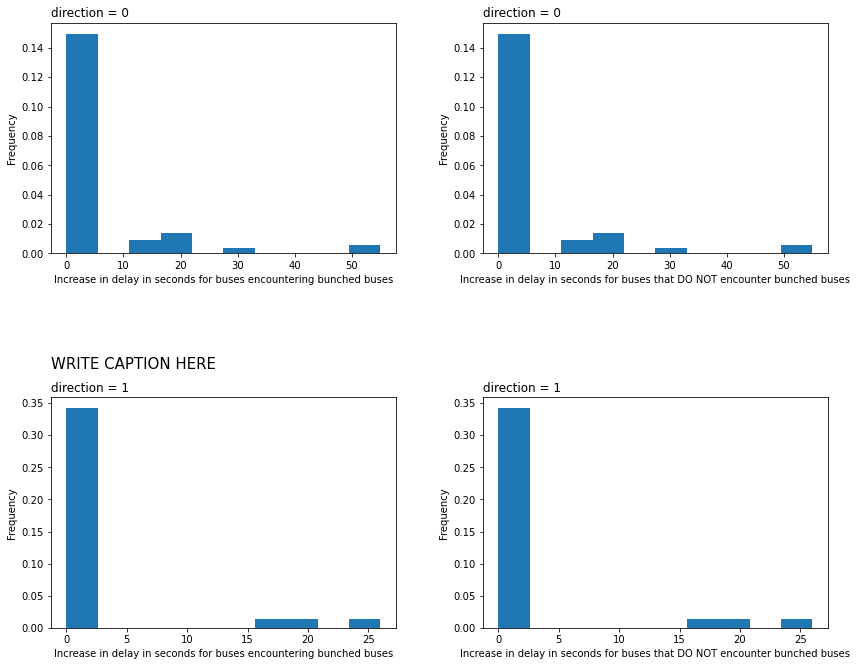

In [108]:
# HISTOGRAM WITH 'DOB NEARBY BUNCHING'
# Plot all buses together for direction = 1 and direction = 0 in separate plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

# Plot direction = 0, buses that encounter bunched buses
ax1.hist(TUdf_masterMTR_deg[(TUdf_masterMTR_deg['direction_number']==0)]['delay_change'], bins = 10, density=True)
ax1.set_xlabel('Increase in delay in seconds for buses encountering bunched buses')#,fontsize=15)
ax1.set_ylabel('Frequency')#,fontsize=15)
ax1.set_position([0,0.3, 0.8, 0.8])
ax1.set_title('direction = 0',loc='left')

# Plot direction = 0, buses that DO NOT encounter bunched buses
ax2.hist(TUdf_masterMTR_deg[(TUdf_masterMTR_deg['direction_number']==0)]['delay_change'], bins = 10, density=True)
ax2.set_xlabel('Increase in delay in seconds for buses that DO NOT encounter bunched buses')#,fontsize=15)
ax2.set_ylabel('Frequency')#,fontsize=15)
ax2.set_position([1,0.3, 0.8, 0.8])
ax2.set_title('direction = 0',loc='left')

# Plot direction = 1, buses that encounter bunched buses
ax3.hist(TUdf_masterMTR_deg[(TUdf_masterMTR_deg['direction_number']==1)]['delay_change'], bins = 10, density=True)
ax3.set_xlabel('Increase in delay in seconds for buses encountering bunched buses')#,fontsize=15)
ax3.set_ylabel('Frequency')#,fontsize=15)
ax3.set_position([0,-1, 0.8, 0.8])
ax3.set_title('direction = 1',loc='left')

# Plot direction = 1, buses that DO NOT encounter bunched buses
ax4.hist(TUdf_masterMTR_deg[(TUdf_masterMTR_deg['direction_number']==1)]['delay_change'], bins = 10, density=True)
ax4.set_xlabel('Increase in delay in seconds for buses that DO NOT encounter bunched buses')#,fontsize=15)
ax4.set_ylabel('Frequency')#,fontsize=15)
ax4.set_position([1,-1, 0.8, 0.8])
ax4.set_title('direction = 1',loc='left')

# x- and y-axis tick formatting
#plt.setp(ax1.xaxis.get_majorticklabels(), rotation=0)
#ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
#plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0)
#ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

# Set plot limits
#ax1.set_ylim([-0.1,1.1])
#ax2.set_ylim([-0.1,1.1])

txt="""WRITE CAPTION HERE"""
plt.figtext(0, -0.10, txt, wrap=False, horizontalalignment='left', fontsize=15)
#plt.tight_layout()

plt.show()

# Save the figure
#plt.savefig('FigureXXX.png',bbox_inches='tight')

### Plot 3 (Figure (H)(1,2))
Scatter plot showng # nearby bunching instances vs change in delay for buses encountering bunched buses

The purpose is to show the impact that the number of nearby bunched buses have on the delay of each bus
i.e. This relates the change in delay to the number of nearby bunching instances

Note: This ignores the effect of timing points

Plot 'nearby_bunch_count_cts' column vs 'delay_change' column

In [109]:
#TUdf_masterMTR_disc = TUdf_masterMTR[(TUdf_masterMTR['nearby_bunch_count_discrete'].isin([0])==False)]# &(TUdf_masterMTR['bunching_0.25hwy'].isin([0])==True)]
#TUdf_masterMTR_cts = TUdf_masterMTR[(TUdf_masterMTR['nearby_bunch_count_cts'].isin([0])==False)]# &(TUdf_masterMTR['bunching_0.25hwy'].isin([0])==True)]
#TUdf_masterMTR_disc.head(1)

#TUdf_masterMTR_deg = TUdf_masterMTR[(TUdf_masterMTR['nearby_bunch_count_DOB'].isin([0])==False)]

In [110]:
#TUdf_masterMTR_cts.head()

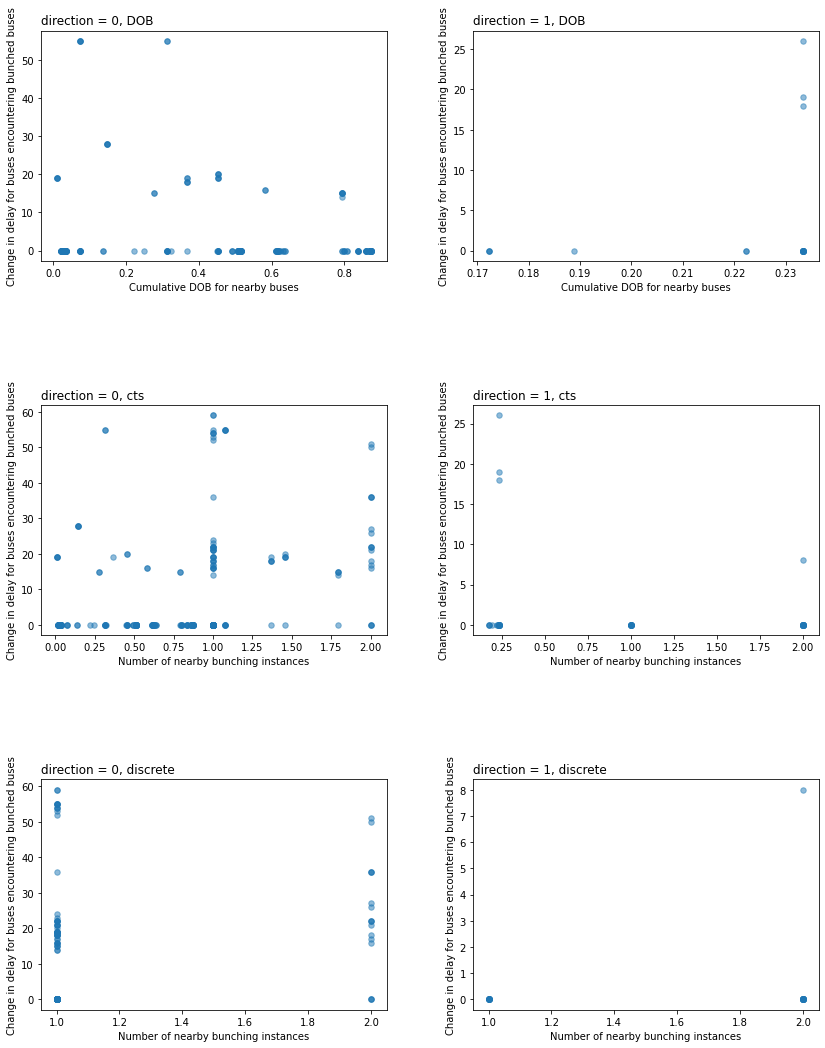

In [111]:
# Plot all buses together for direction = 1 and direction = 0 in separate plots - NOTE: no differentiation bw different routes here
fig, ((ax5, ax6), (ax1, ax2), (ax3, ax4)) = plt.subplots(3, 2)

bulletSize = 30

# Plot direction = 0, nearby_bunch_count_cts
ax1.scatter(TUdf_masterMTR_cts[TUdf_masterMTR_cts['direction_number']==0]['nearby_bunch_count_cts'],TUdf_masterMTR_cts[TUdf_masterMTR_cts['direction_number']==0]['delay_change'], s= bulletSize,alpha=0.5)
ax1.set_xlabel('Number of nearby bunching instances')#,fontsize=15)
ax1.set_ylabel('Change in delay for buses encountering bunched buses')#,fontsize=15)
ax1.set_position([0,-1, 0.8, 0.8])
ax1.set_title('direction = 0, cts',loc='left')

# Plot direction = 1, nearby_bunch_count_cts
ax2.scatter(TUdf_masterMTR_cts[TUdf_masterMTR_cts['direction_number']==1]['nearby_bunch_count_cts'],TUdf_masterMTR_cts[TUdf_masterMTR_cts['direction_number']==1]['delay_change'], s= bulletSize,alpha=0.5)
ax2.set_xlabel('Number of nearby bunching instances')#,fontsize=15)
ax2.set_ylabel('Change in delay for buses encountering bunched buses')#,fontsize=15)
ax2.set_position([1,-1, 0.8, 0.8])
ax2.set_title('direction = 1, cts',loc='left')

# Plot direction = 0, nearby_bunch_count_discrete
ax3.scatter(TUdf_masterMTR_disc[TUdf_masterMTR_disc['direction_number']==0]['nearby_bunch_count_discrete'],TUdf_masterMTR_disc[TUdf_masterMTR_disc['direction_number']==0]['delay_change'], s= bulletSize,alpha=0.5)
ax3.set_xlabel('Number of nearby bunching instances')#,fontsize=15)
ax3.set_ylabel('Change in delay for buses encountering bunched buses')#,fontsize=15)
ax3.set_position([0,-2.3, 0.8, 0.8])
ax3.set_title('direction = 0, discrete',loc='left')

# Plot direction = 1, nearby_bunch_count_discrete
ax4.scatter(TUdf_masterMTR_disc[TUdf_masterMTR_disc['direction_number']==1]['nearby_bunch_count_discrete'],TUdf_masterMTR_disc[TUdf_masterMTR_disc['direction_number']==1]['delay_change'], s= bulletSize,alpha=0.5)
ax4.set_xlabel('Number of nearby bunching instances')#,fontsize=15)
ax4.set_ylabel('Change in delay for buses encountering bunched buses')#,fontsize=15)
ax4.set_position([1,-2.3, 0.8, 0.8])
ax4.set_title('direction = 1, discrete',loc='left')

# Plot direction = 0, nearby_DOB
ax5.scatter(TUdf_masterMTR_deg[TUdf_masterMTR_deg['direction_number']==0]['nearby_bunch_count_DOB'],TUdf_masterMTR_deg[TUdf_masterMTR_deg['direction_number']==0]['delay_change'], s= bulletSize,alpha=0.5)
ax5.set_xlabel('Cumulative DOB for nearby buses')#,fontsize=15)
ax5.set_ylabel('Change in delay for buses encountering bunched buses')#,fontsize=15)
ax5.set_position([0,0.3, 0.8, 0.8])
ax5.set_title('direction = 0, DOB',loc='left')

# Plot direction = 1, nearby_DOB
ax6.scatter(TUdf_masterMTR_deg[TUdf_masterMTR_deg['direction_number']==1]['nearby_bunch_count_DOB'],TUdf_masterMTR_deg[TUdf_masterMTR_deg['direction_number']==1]['delay_change'], s= bulletSize,alpha=0.5)
ax6.set_xlabel('Cumulative DOB for nearby buses')#,fontsize=15)
ax6.set_ylabel('Change in delay for buses encountering bunched buses')#,fontsize=15)
ax6.set_position([1,0.3, 0.8, 0.8])
ax6.set_title('direction = 1, DOB',loc='left')

# x- and y-axis tick formatting
#plt.setp(ax1.xaxis.get_majorticklabels(), rotation=0)
#ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
#plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0)
#ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

# Set plot limits
#ax1.set_ylim([-0.1,1.1])
#ax2.set_ylim([-0.1,1.1])



#txt="""WRITE CAPTION HERE"""
#plt.figtext(0, -0.10, txt, wrap=False, horizontalalignment='left', fontsize=15)
#plt.tight_layout()

plt.show()

# Save the figure
#plt.savefig('FigureXXX.png',bbox_inches='tight')




In [112]:
# This is all the routes that encounter a bunched instance of the 430 bus
routesEncounteringBunching_disc = TUdf_masterMTR_disc.route_short_name.unique().tolist()
routesEncounteringBunching_cts = TUdf_masterMTR_cts.route_short_name.unique().tolist()
routesEncounteringBunching_dob = TUdf_masterMTR_deg.route_short_name.unique().tolist()

listOfRoutes_INTERACTIONS_W430_MTR = routesEncounteringBunching_disc + routesEncounteringBunching_cts + routesEncounteringBunching_dob

listOfRoutes_INTERACTIONS_W430_MTR = list(dict.fromkeys(listOfRoutes_INTERACTIONS_W430_MTR))

#print(len(routesEncounteringBunching_disc))
#print(len(routesEncounteringBunching_cts))
#print(len(routesEncounteringBunching_dob))
#print(len(listOfRoutes_INTERACTIONS_W430_MTR))

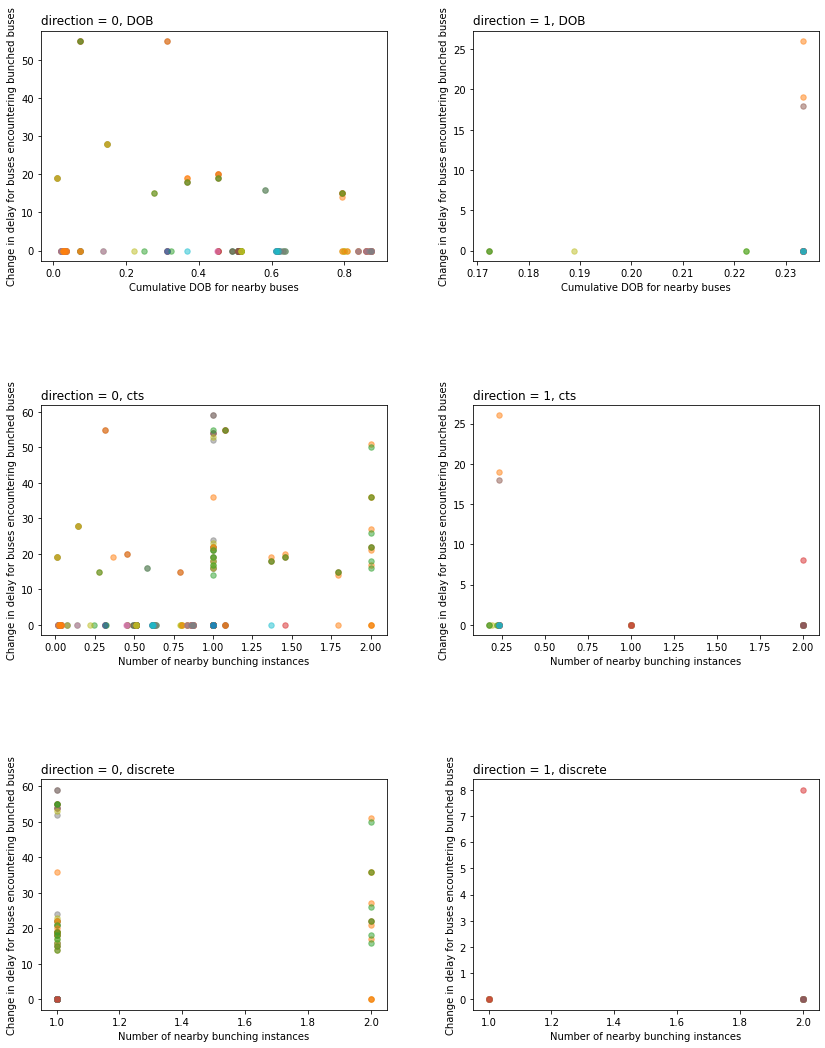

In [113]:
# Plot all buses together for direction = 1 and direction = 0 in separate plots - NOTE: PLOTTED BASED ON ROUTES
fig, ((ax5, ax6), (ax1, ax2), (ax3, ax4)) = plt.subplots(3, 2)

bulletSize = 30 

for route in listOfRoutes_INTERACTIONS_W430_MTR:
    
    # Plot direction = 0, nearby_bunch_count_cts
    ax1.scatter(TUdf_masterMTR_cts[(TUdf_masterMTR_cts['route_short_name']==route) & (TUdf_masterMTR_cts['direction_number']==0)]['nearby_bunch_count_cts'],TUdf_masterMTR_cts[(TUdf_masterMTR_cts['route_short_name']==route) & (TUdf_masterMTR_cts['direction_number']==0)]['delay_change'], s= bulletSize,alpha=0.5)

    # Plot direction = 1, nearby_bunch_count_cts
    ax2.scatter(TUdf_masterMTR_cts[(TUdf_masterMTR_cts['route_short_name']==route) & (TUdf_masterMTR_cts['direction_number']==1)]['nearby_bunch_count_cts'],TUdf_masterMTR_cts[(TUdf_masterMTR_cts['route_short_name']==route) & (TUdf_masterMTR_cts['direction_number']==1)]['delay_change'], s= bulletSize,alpha=0.5)

    # Plot direction = 0, nearby_bunch_count_discrete
    ax3.scatter(TUdf_masterMTR_disc[(TUdf_masterMTR_disc['route_short_name']==route) & (TUdf_masterMTR_disc['direction_number']==0)]['nearby_bunch_count_discrete'],TUdf_masterMTR_disc[(TUdf_masterMTR_disc['route_short_name']==route) & (TUdf_masterMTR_disc['direction_number']==0)]['delay_change'], s= bulletSize,alpha=0.5)

    # Plot direction = 1, nearby_bunch_count_discrete
    ax4.scatter(TUdf_masterMTR_disc[(TUdf_masterMTR_disc['route_short_name']==route) & (TUdf_masterMTR_disc['direction_number']==1)]['nearby_bunch_count_discrete'],TUdf_masterMTR_disc[(TUdf_masterMTR_disc['route_short_name']==route) & (TUdf_masterMTR_disc['direction_number']==1)]['delay_change'], s= bulletSize,alpha=0.5)

    # Plot direction = 0, nearby_DOB
    ax5.scatter(TUdf_masterMTR_deg[(TUdf_masterMTR_deg['route_short_name']==route) & (TUdf_masterMTR_deg['direction_number']==0)]['nearby_bunch_count_DOB'],TUdf_masterMTR_deg[(TUdf_masterMTR_deg['route_short_name']==route) & (TUdf_masterMTR_deg['direction_number']==0)]['delay_change'], s= bulletSize,alpha=0.5)

    # Plot direction = 1, nearby_DOB
    ax6.scatter(TUdf_masterMTR_deg[(TUdf_masterMTR_deg['route_short_name']==route) & (TUdf_masterMTR_deg['direction_number']==1)]['nearby_bunch_count_DOB'],TUdf_masterMTR_deg[(TUdf_masterMTR_deg['route_short_name']==route) & (TUdf_masterMTR_deg['direction_number']==1)]['delay_change'], s= bulletSize,alpha=0.5)


# FORMATTING
ax1.set_xlabel('Number of nearby bunching instances')#,fontsize=15)
ax1.set_ylabel('Change in delay for buses encountering bunched buses')#,fontsize=15)
ax1.set_position([0,-1, 0.8, 0.8])
ax1.set_title('direction = 0, cts',loc='left')
ax2.set_xlabel('Number of nearby bunching instances')#,fontsize=15)
ax2.set_ylabel('Change in delay for buses encountering bunched buses')#,fontsize=15)
ax2.set_position([1,-1, 0.8, 0.8])
ax2.set_title('direction = 1, cts',loc='left')
ax3.set_xlabel('Number of nearby bunching instances')#,fontsize=15)
ax3.set_ylabel('Change in delay for buses encountering bunched buses')#,fontsize=15)
ax3.set_position([0,-2.3, 0.8, 0.8])
ax3.set_title('direction = 0, discrete',loc='left')
ax4.set_xlabel('Number of nearby bunching instances')#,fontsize=15)
ax4.set_ylabel('Change in delay for buses encountering bunched buses')#,fontsize=15)
ax4.set_position([1,-2.3, 0.8, 0.8])
ax4.set_title('direction = 1, discrete',loc='left')
ax5.set_xlabel('Cumulative DOB for nearby buses')#,fontsize=15)
ax5.set_ylabel('Change in delay for buses encountering bunched buses')#,fontsize=15)
ax5.set_position([0,0.3, 0.8, 0.8])
ax5.set_title('direction = 0, DOB',loc='left')
ax6.set_xlabel('Cumulative DOB for nearby buses')#,fontsize=15)
ax6.set_ylabel('Change in delay for buses encountering bunched buses')#,fontsize=15)
ax6.set_position([1,0.3, 0.8, 0.8])
ax6.set_title('direction = 1, DOB',loc='left')

# x- and y-axis tick formatting
#plt.setp(ax1.xaxis.get_majorticklabels(), rotation=0)
#ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
#plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0)
#ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

# Set plot limits
#ax1.set_ylim([-0.1,1.1])
#ax2.set_ylim([-0.1,1.1])

#txt="""WRITE CAPTION HERE"""
#plt.figtext(0, -0.10, txt, wrap=False, horizontalalignment='left', fontsize=15)
#plt.tight_layout()

plt.show()

# Save the figure
#plt.savefig('FigureXXX.png',bbox_inches='tight')

#### Output dataframe to .pkl file - for use in LOGIT-regression fitting/analysis

In [114]:
#pathname_df_TU_LOGIT = '/home/XXXLOGIT_DATAXXX'
#filename_df_TU_LOGIT = filename_PRO[:-14] + '_LOGIT.pkl'

#df_TU_condensed.to_csv(os.path.join(pathname_df_TU_processed,'20200508_XXXX_TU_MILITARY_PROCESSED.csv'), index = False)

# SAVE AS PICKLE FILE TO PRESERVE DTYPES:
#df_TU_condensed.to_pickle(os.path.join(pathname_df_TU_LOGIT,filename_df_TU_LOGIT))

# SCRAP

In [115]:
'''
# LOGIT WITH 'CONTINUOUS NEARBY BUNCHING '
# Plot all buses together for direction = 1 and direction = 0 in separate plots
fig, (ax1, ax2) = plt.subplots(1, 2)

# Plot direction = 0
ax1.scatter(TUdf_masterMTR_cts[TUdf_masterMTR_cts['direction_number']==0]['nearby_bunch_count_cts'],TUdf_masterMTR_cts[TUdf_masterMTR_cts['direction_number']==0]['bunchingBehind_0.25hwy'],s=20)
ax1.set_xlabel('Nearby bunching instances')#,fontsize=15)
ax1.set_ylabel('Probability of bunching with bus behind')#,fontsize=15)
ax1.set_position([0,0.3, 0.8, 0.8])
ax1.set_title('direction = 0',loc='left')

# Plot direction = 1
ax2.scatter(TUdf_masterMTR_cts[TUdf_masterMTR_cts['direction_number']==1]['nearby_bunch_count_cts'], TUdf_masterMTR_cts[TUdf_masterMTR_cts['direction_number']==1]['bunchingBehind_0.25hwy'],s=20)
ax2.set_xlabel('Nearby bunching instances')#,fontsize=15)
ax2.set_ylabel('Probability of bunching with bus behind')#,fontsize=15)
ax2.set_position([1,0.3, 0.8, 0.8])
ax2.set_title('direction = 1',loc='left')

# x- and y-axis tick formatting
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=0)
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0)
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

# Set plot limits
ax1.set_ylim([-0.1,1.1])
ax2.set_ylim([-0.1,1.1])

txt="""WRITE CAPTION HERE"""
plt.figtext(0, -0.10, txt, wrap=False, horizontalalignment='left', fontsize=15)
#plt.tight_layout()

plt.show()

# Save the figure
#plt.savefig('FigureXXX.png',bbox_inches='tight')
'''

'\n# LOGIT WITH \'CONTINUOUS NEARBY BUNCHING \'\n# Plot all buses together for direction = 1 and direction = 0 in separate plots\nfig, (ax1, ax2) = plt.subplots(1, 2)\n\n# Plot direction = 0\nax1.scatter(TUdf_masterMTR_cts[TUdf_masterMTR_cts[\'direction_number\']==0][\'nearby_bunch_count_cts\'],TUdf_masterMTR_cts[TUdf_masterMTR_cts[\'direction_number\']==0][\'bunchingBehind_0.25hwy\'],s=20)\nax1.set_xlabel(\'Nearby bunching instances\')#,fontsize=15)\nax1.set_ylabel(\'Probability of bunching with bus behind\')#,fontsize=15)\nax1.set_position([0,0.3, 0.8, 0.8])\nax1.set_title(\'direction = 0\',loc=\'left\')\n\n# Plot direction = 1\nax2.scatter(TUdf_masterMTR_cts[TUdf_masterMTR_cts[\'direction_number\']==1][\'nearby_bunch_count_cts\'], TUdf_masterMTR_cts[TUdf_masterMTR_cts[\'direction_number\']==1][\'bunchingBehind_0.25hwy\'],s=20)\nax2.set_xlabel(\'Nearby bunching instances\')#,fontsize=15)\nax2.set_ylabel(\'Probability of bunching with bus behind\')#,fontsize=15)\nax2.set_position([1,0

In [116]:
'''
# LOGIT WITH 'DISCRETE NEARBY BUNCHING '
# Plot all buses together for direction = 1 and direction = 0 in separate plots
fig, (ax1, ax2) = plt.subplots(1, 2)

# Plot direction = 0
ax1.scatter(TUdf_masterMTR_disc[TUdf_masterMTR_disc['direction_number']==0]['nearby_bunch_count_discrete'],TUdf_masterMTR_disc[TUdf_masterMTR_disc['direction_number']==0]['bunchingBehind_0.25hwy'],s=20)
ax1.set_xlabel('Nearby bunching instances')#,fontsize=15)
ax1.set_ylabel('Probability of bunching with bus behind')#,fontsize=15)
ax1.set_position([0,0.3, 0.8, 0.8])
ax1.set_title('direction = 0',loc='left')

# Plot direction = 1
ax2.scatter(TUdf_masterMTR_disc[TUdf_masterMTR_disc['direction_number']==1]['nearby_bunch_count_discrete'], TUdf_masterMTR_disc[TUdf_masterMTR_disc['direction_number']==1]['bunchingBehind_0.25hwy'],s=20)
ax2.set_xlabel('Nearby bunching instances')#,fontsize=15)
ax2.set_ylabel('Probability of bunching with bus behind')#,fontsize=15)
ax2.set_position([1,0.3, 0.8, 0.8])
ax2.set_title('direction = 1',loc='left')

# x- and y-axis tick formatting
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=0)
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0)
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

# Set plot limits
ax1.set_ylim([-0.1,1.1])
ax2.set_ylim([-0.1,1.1])



txt="""WRITE CAPTION HERE"""
plt.figtext(0, -0.10, txt, wrap=False, horizontalalignment='left', fontsize=15)
#plt.tight_layout()

plt.show()

# Save the figure
#plt.savefig('FigureXXX.png',bbox_inches='tight')
'''

'\n# LOGIT WITH \'DISCRETE NEARBY BUNCHING \'\n# Plot all buses together for direction = 1 and direction = 0 in separate plots\nfig, (ax1, ax2) = plt.subplots(1, 2)\n\n# Plot direction = 0\nax1.scatter(TUdf_masterMTR_disc[TUdf_masterMTR_disc[\'direction_number\']==0][\'nearby_bunch_count_discrete\'],TUdf_masterMTR_disc[TUdf_masterMTR_disc[\'direction_number\']==0][\'bunchingBehind_0.25hwy\'],s=20)\nax1.set_xlabel(\'Nearby bunching instances\')#,fontsize=15)\nax1.set_ylabel(\'Probability of bunching with bus behind\')#,fontsize=15)\nax1.set_position([0,0.3, 0.8, 0.8])\nax1.set_title(\'direction = 0\',loc=\'left\')\n\n# Plot direction = 1\nax2.scatter(TUdf_masterMTR_disc[TUdf_masterMTR_disc[\'direction_number\']==1][\'nearby_bunch_count_discrete\'], TUdf_masterMTR_disc[TUdf_masterMTR_disc[\'direction_number\']==1][\'bunchingBehind_0.25hwy\'],s=20)\nax2.set_xlabel(\'Nearby bunching instances\')#,fontsize=15)\nax2.set_ylabel(\'Probability of bunching with bus behind\')#,fontsize=15)\nax2.s